In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Renewable_Energy_India.csv", header=0)

In [3]:
data.head(2)

,Year,Renewable Energy Consumption (EJ),Renewable Energy Generation (EJ),Renewable Energy Generation (TWh)
0,1990,0.0008,0.0008,0.0679
1,1991,0.0023,0.0023,0.2080


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               32 non-null     int64  
 1   Renewable Energy Consumption (EJ)  32 non-null     float64
 2   Renewable Energy Generation (EJ)   32 non-null     float64
 3   Renewable Energy Generation (TWh)  32 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [5]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

In [6]:
data['Year'] = data['Year'].values.astype(np.int64)

In [7]:
data['Renewable Energy Consumption (EJ)'] = pd.to_numeric(data['Renewable Energy Consumption (EJ)'], errors='coerce')
data['Renewable Energy Generation (EJ)'] = pd.to_numeric(data['Renewable Energy Generation (EJ)'], errors='coerce')
data['Renewable Energy Generation (TWh)'] = pd.to_numeric(data['Renewable Energy Generation (TWh)'], errors='coerce')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,32.0,2005.500000,9.380832,1990.0000,1997.750000,2005.5000,2013.250000,2021.0000
Renewable Energy Consumption (EJ),32.0,0.417366,0.523351,0.0008,0.025275,0.1651,0.649000,1.7884
Renewable Energy Generation (EJ),32.0,0.386800,0.496743,0.0008,0.025275,0.1341,0.604225,1.6926
Renewable Energy Generation (TWh),32.0,37.966844,50.007054,0.0679,2.277125,12.4879,57.698775,171.8737


In [9]:
from datetime import datetime
data['Year'] = pd.to_datetime(data['Year'],format="%Y")

In [10]:
data = data.set_index('Year')
data.head(2)

,Renewable Energy Consumption (EJ),Renewable Energy Generation (EJ),Renewable Energy Generation (TWh)
Year,,,
1990-01-01,0.0008,0.0008,0.0679
1991-01-01,0.0023,0.0023,0.2080


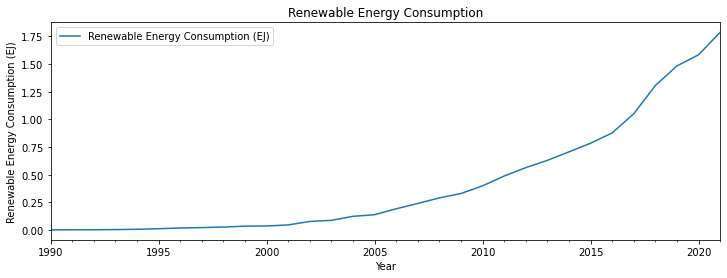

In [11]:
data['Renewable Energy Consumption (EJ)'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Renewable Energy Consumption')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show(block=False)

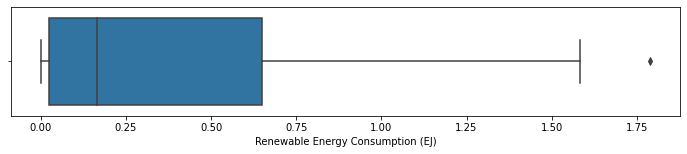

In [12]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Renewable Energy Consumption (EJ)'], whis=1.5)

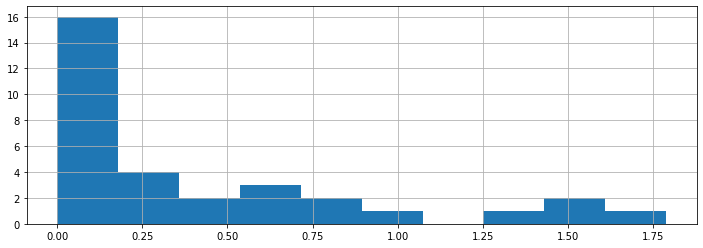

In [13]:
fig = data['Renewable Energy Consumption (EJ)'].hist(figsize=(12,4))

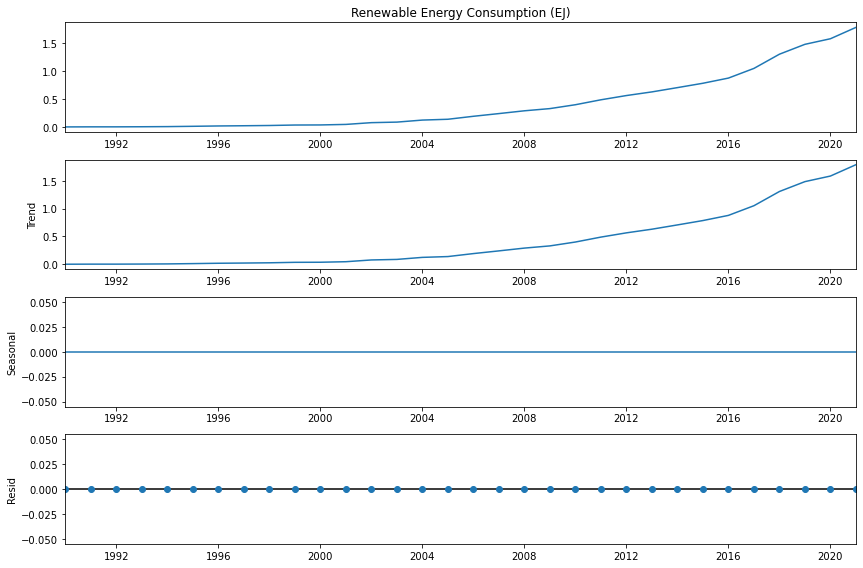

In [14]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['Renewable Energy Consumption (EJ)'], model='additive')
fig = decomposition.plot()
plt.show()

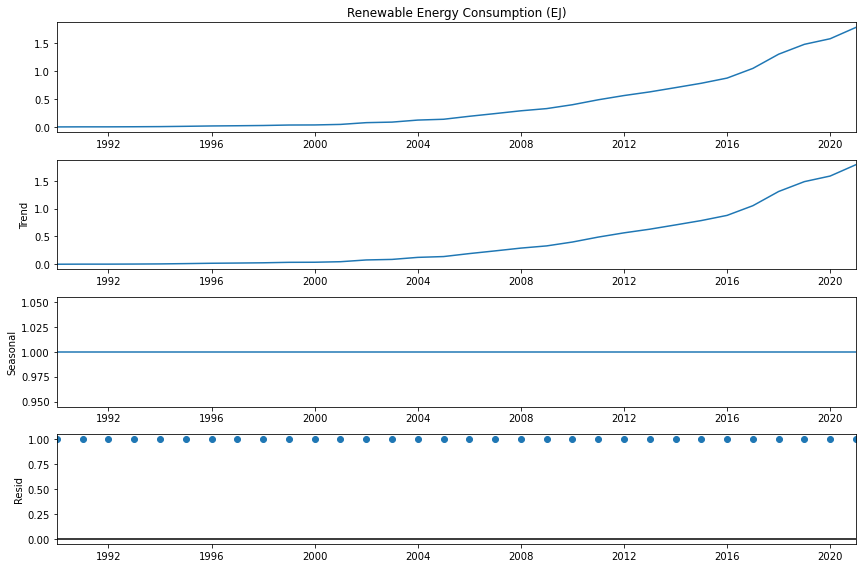

In [15]:
decomposition = sm.tsa.seasonal_decompose(data['Renewable Energy Consumption (EJ)'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [16]:
train_len = 27
train = data[0:train_len]
test = data[train_len:]

## Holt's exponential smoothing method with Trend

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Renewable Energy Consumption (EJ)']), trend='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(5)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 0.0008, 'initial_trend': 0.0015, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast 

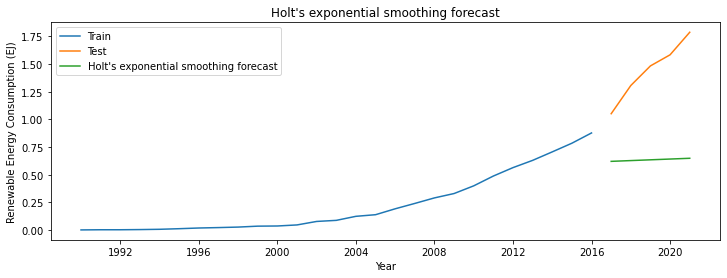

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['Renewable Energy Consumption (EJ)'], label='Train')
plt.plot(test['Renewable Energy Consumption (EJ)'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s exponential smoothing forecast')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

### Calculate RMSE and MAPE 

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate metrics
rmse = np.sqrt(mean_squared_error(test['Renewable Energy Consumption (EJ)'],y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Renewable Energy Consumption (EJ)']-y_hat_holt['holt_forecast'])/test['Renewable Energy Consumption (EJ)'])*100,2)
mae = mean_absolute_error(test['Renewable Energy Consumption (EJ)'], y_hat_holt['holt_forecast']).round(2)
mse = mean_squared_error(test['Renewable Energy Consumption (EJ)'], y_hat_holt['holt_forecast']).round(2)


# Construct results dataframe
results = pd.DataFrame({
    'Method': ['Holt\'s exponential smoothing forecast'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})


results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71


## Holt Winters' Additive Method with Trend and Seasonality

In [20]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Renewable Energy Consumption (EJ)']), 
                             trend='add', seasonal_periods=5, seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(5)

{'smoothing_level': 0.8009187907100329, 'smoothing_trend': 0.8009187907100329, 'smoothing_seasonal': 0.16939144646054405, 'damping_trend': nan, 'initial_level': 0.2313998739595309, 'initial_trend': -0.0033617657481457165, 'initial_seasons': array([-0.22758539, -0.22158356, -0.22133685, -0.22685251, -0.22715427]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast 

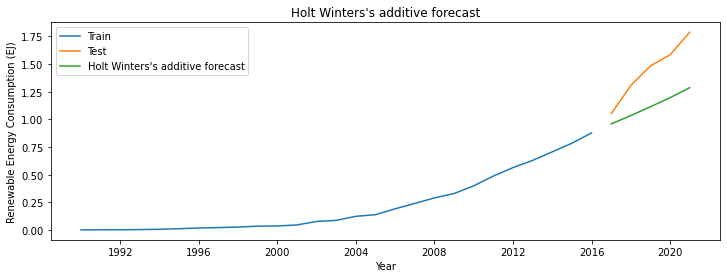

In [21]:
plt.figure(figsize=(12,4))
plt.plot(train['Renewable Energy Consumption (EJ)'], label='Train')
plt.plot(test['Renewable Energy Consumption (EJ)'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\'s additive forecast')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

### Calculate RMSE and MAPE 

In [22]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(test['Renewable Energy Consumption (EJ)'],y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Renewable Energy Consumption (EJ)']-y_hat_hwa['hwa_forecast'])/test['Renewable Energy Consumption (EJ)'])*100,2)
mae = mean_absolute_error(test['Renewable Energy Consumption (EJ)'], y_hat_hwa['hwa_forecast']).round(2)
mse = mean_squared_error(test['Renewable Energy Consumption (EJ)'], y_hat_hwa['hwa_forecast']).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Holt Winters\'s additive forecast'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12


## Holt Winters' Multiplicative Method with Trend and Seasonality 

In [23]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Renewable Energy Consumption (EJ)']), seasonal_periods=5, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(5)

{'smoothing_level': 0.7642522936103906, 'smoothing_trend': 0.7642522936103906, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 0.0, 'initial_trend': 0.09382301876699868, 'initial_seasons': array([0.06082942, 0.06234984, 0.06284408, 0.06149188, 0.06085659]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast 

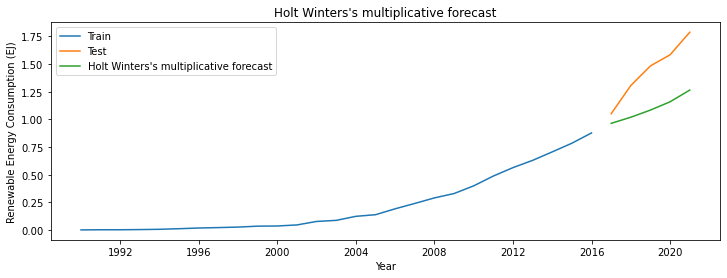

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Renewable Energy Consumption (EJ)'], label='Train')
plt.plot(test['Renewable Energy Consumption (EJ)'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winters\'s multiplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\'s multiplicative forecast')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

### Calculate RMSE and MAPE 

In [25]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(test['Renewable Energy Consumption (EJ)'],y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Renewable Energy Consumption (EJ)']-y_hat_hwm['hwm_forecast'])/test['Renewable Energy Consumption (EJ)'])*100,2)
mae = mean_absolute_error(test['Renewable Energy Consumption (EJ)'], y_hat_hwm['hwm_forecast']).round(2)
mse = mean_squared_error(test['Renewable Energy Consumption (EJ)'], y_hat_hwm['hwm_forecast']).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Holt Winters\'s multiplicative forecast'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14


## Auto Regressive models 

## Augmented Dickey-Fuller (ADF) test 

In [26]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Renewable Energy Consumption (EJ)'])

print('ADF statistic: %f' % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: 2.777507
Critical value @ 0.05: -3.01
p-value: 1.000000


In [27]:
adf_test

(2.777506919936218,
 1.0,
 9,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 -91.70843546285897)

## KPSS test

In [28]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Renewable Energy Consumption (EJ)'])

print('KPSS statistic %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS statistic 0.407369
Critical value @ 0.05: 0.46
p-value: 0.073979


In [29]:
kpss_test

(0.40736891360679905,
 0.07397891654879352,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## Box Cox transformation 

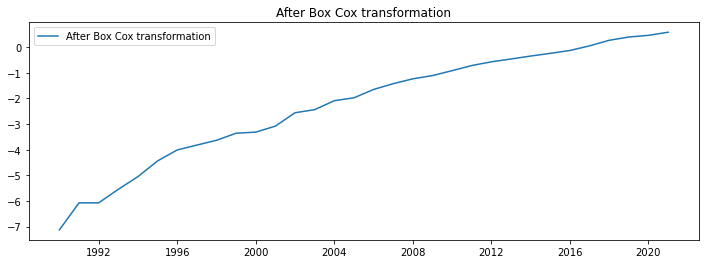

In [30]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Renewable Energy Consumption (EJ)'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox transformation')
plt.legend(loc='best')
plt.title('After Box Cox transformation')
plt.show()

## Differencing 

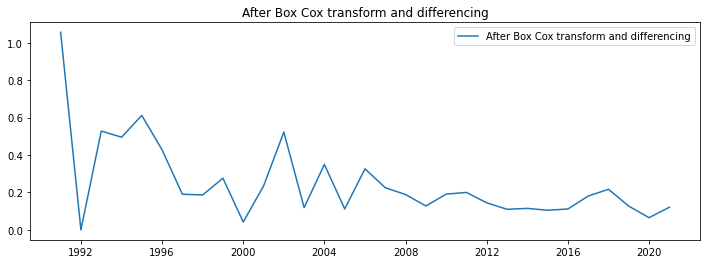

In [31]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index = data.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox transform and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

## ADF test 

In [32]:
adf_test = adfuller(data_boxcox_diff)

print('ADF statistic: %f' % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: -7.238869
Critical value @ 0.05: -2.96
p-value: 0.000000


## KPSS test

In [33]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS statistic %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS statistic 0.445431
Critical value @ 0.05: 0.46
p-value: 0.057573


## Autocorrelation function (ACF) plot 

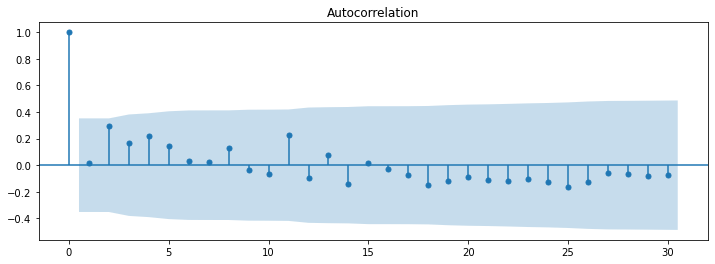

In [34]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## Partial autocorrelation function (PACF) plot 

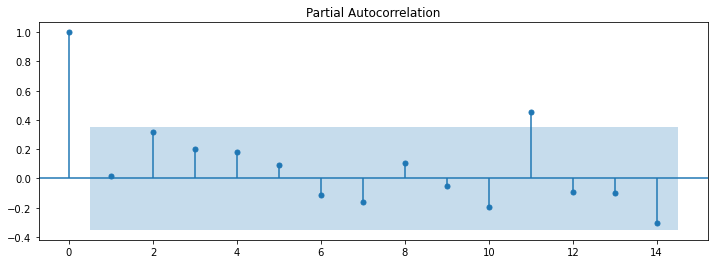

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=14)
plt.show()

## Split into training and test data sets 

In [36]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto regressive moving average (ARMA) method

In [37]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(0,0,11))
model_fit = model.fit()
print(model_fit.params)

C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


const     0.296841
ma.L1     0.004188
ma.L2     0.621229
ma.L3     0.096730
ma.L4     0.521326
ma.L5     0.056900
ma.L6     0.547831
ma.L7     0.198694
ma.L8     0.775494
ma.L9    -0.464107
ma.L10    0.218909
ma.L11   -0.063464
sigma2    0.020463
dtype: float64


C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Recover original time series forecast 

In [38]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast 

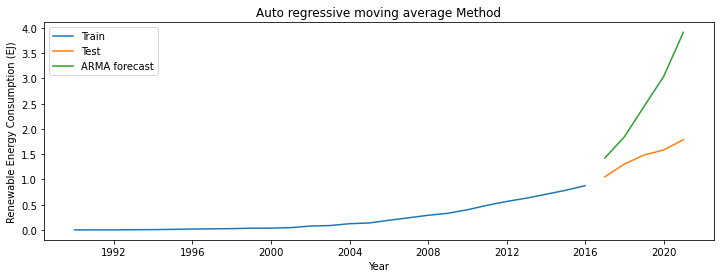

In [39]:
plt.figure(figsize=(12,4))
plt.plot(train['Renewable Energy Consumption (EJ)'], label='Train')
plt.plot(test['Renewable Energy Consumption (EJ)'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('Auto regressive moving average Method')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

### Calculate RMSE and MAPE 

In [40]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(test['Renewable Energy Consumption (EJ)'],y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Renewable Energy Consumption (EJ)']-y_hat_arma['arma_forecast'][train_len-1:])/test['Renewable Energy Consumption (EJ)'])*100,2)
mae = mean_absolute_error(test['Renewable Energy Consumption (EJ)'], y_hat_arma['arma_forecast'][train_len-1:]).round(2)
mse = mean_squared_error(test['Renewable Energy Consumption (EJ)'], y_hat_arma['arma_forecast'][train_len-1:]).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['ARMA method'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60


## Auto regressive integrated moving average (ARIMA) method

In [41]:
model = ARIMA(train_data_boxcox, order=(0,1,2))
model_fit = model.fit()
print(model_fit.params)

ma.L1     0.626760
ma.L2     0.788906
sigma2    0.069032
dtype: float64


C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


### Recover original time series forecast

In [42]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

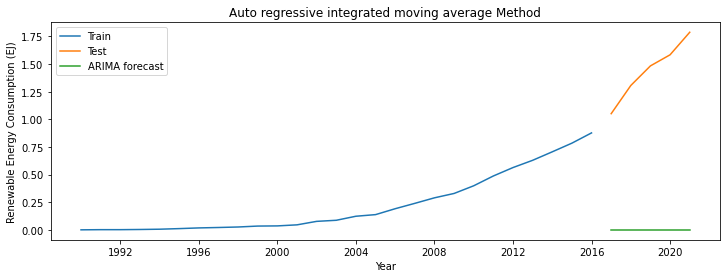

In [43]:
plt.figure(figsize=(12,4))
plt.plot(train['Renewable Energy Consumption (EJ)'], label='Train')
plt.plot(test['Renewable Energy Consumption (EJ)'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Auto regressive integrated moving average Method')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

### Calculate RMSE and MAPE

In [44]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(test['Renewable Energy Consumption (EJ)'],y_hat_arima['arima_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Renewable Energy Consumption (EJ)']-y_hat_arima['arima_forecast'][train_len-1:])/test['Renewable Energy Consumption (EJ)'])*100,2)
mae = mean_absolute_error(test['Renewable Energy Consumption (EJ)'], y_hat_arima['arima_forecast'][train_len-1:]).round(2)
mse = mean_squared_error(test['Renewable Energy Consumption (EJ)'], y_hat_arima['arima_forecast'][train_len-1:]).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['ARIMA method'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14


## Seasonal Auto regressive integrated moving average (SARIMA) 

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order = (0,1,2), seasonal_order = (0,1,2,12))
model_fit = model.fit()
print(model_fit.params)

C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


ma.L1      -0.372235
ma.L2       0.983256
ma.S.L12   -0.187542
ma.S.L24   -0.138756
sigma2      0.057782
dtype: float64


### Recover original time series forecast

In [46]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

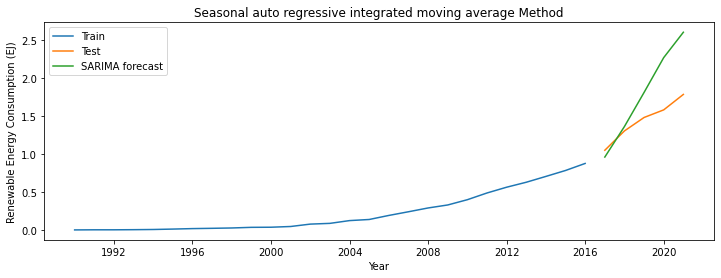

In [47]:
plt.figure(figsize=(12,4))
plt.plot(train['Renewable Energy Consumption (EJ)'], label='Train')
plt.plot(test['Renewable Energy Consumption (EJ)'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal auto regressive integrated moving average Method')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

### Calculate RMSE and MAPE

In [48]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(test['Renewable Energy Consumption (EJ)'],y_hat_sarima['sarima_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Renewable Energy Consumption (EJ)']-y_hat_sarima['sarima_forecast'][train_len-1:])/test['Renewable Energy Consumption (EJ)'])*100,2)
mae = mean_absolute_error(test['Renewable Energy Consumption (EJ)'], y_hat_sarima['sarima_forecast'][train_len-1:]).round(2)
mse = mean_squared_error(test['Renewable Energy Consumption (EJ)'], y_hat_sarima['sarima_forecast'][train_len-1:]).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['SARIMA method'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25


## Vanilla LSTM

In [49]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Reshape
from numpy import array


# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X_train, y_train = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X_train.append(seq_x)
        y_train.append(seq_y)
    return array(X_train), array(y_train)

# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:25]
# choose a number of time steps
n_steps = 3
# split into samples
X_train1, y_train1 = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X_train1)):
    print(X_train1[i], y_train1[i])
    
    
raw_seq_test = data['Renewable Energy Consumption (EJ)'][24:32]
X_test1, y_test1 = split_sequence(raw_seq_test, n_steps)    


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train01 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1], n_features))
# define model
model01 = Sequential()
model01.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model01.add(Dense(1))
model01.compile(optimizer='adam', loss='mse')
# fit model
model01.fit(X_train01, y_train1, epochs=200, verbose=0)

[0.0008 0.0023 0.0023] 0.0039
[0.0023 0.0023 0.0039] 0.0064
[0.0023 0.0039 0.0064] 0.0118
[0.0039 0.0064 0.0118] 0.0181
[0.0064 0.0118 0.0181] 0.0219
[0.0118 0.0181 0.0219] 0.0264
[0.0181 0.0219 0.0264] 0.0348
[0.0219 0.0264 0.0348] 0.0363
[0.0264 0.0348 0.0363] 0.0459
[0.0348 0.0363 0.0459] 0.0774
[0.0363 0.0459 0.0774] 0.0872
[0.0459 0.0774 0.0872] 0.1237
[0.0774 0.0872 0.1237] 0.1384
[0.0872 0.1237 0.1384] 0.1918
[0.1237 0.1384 0.1918] 0.2403
[0.1384 0.1918 0.2403] 0.2903
[0.1918 0.2403 0.2903] 0.3299
[0.2403 0.2903 0.3299] 0.3994
[0.2903 0.3299 0.3994] 0.488
[0.3299 0.3994 0.488 ] 0.5641
[0.3994 0.488  0.5641] 0.6298
[0.488  0.5641 0.6298] 0.7066


In [50]:
yhat01 = model01.predict(X_test1, verbose=0)
print(yhat01)

[[0.95792216]
 [1.0815771 ]
 [1.2780855 ]
 [1.5511154 ]
 [1.8424531 ]]


In [51]:
from sklearn.metrics import mean_squared_error
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1,yhat01)).round(2)
mape = np.round(np.mean(np.abs(y_test1-yhat01)/y_test1)*100,2)
mae = mean_absolute_error(y_test1, yhat01).round(2)
mse = mean_squared_error(y_test1, yhat01).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Vanilla LSTM_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02


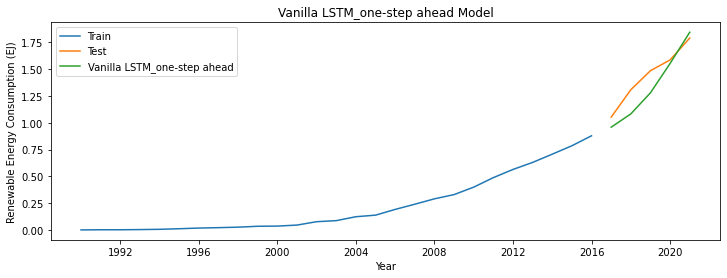

In [52]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat01, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Vanilla LSTM_one-step ahead')
plt.legend(loc='best')
plt.title('Vanilla LSTM_one-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [53]:
# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()



# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train0 = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

# define model
model0 = Sequential()
model0.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model0.add(Dense(n_steps_out))
model0.compile(optimizer='adam', loss='mse')

# fit model
model0.fit(X_train0, y_train, epochs=1000, verbose=0)

[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [54]:
X_test0 = X_test.values.reshape((1, n_steps_in, n_features))
yhat0 = model0.predict(X_test0, verbose=0)
print(yhat0)

[[1.1028948 1.1608233 1.2797713 1.3909827 1.471696 ]]


In [55]:
from sklearn.metrics import mean_squared_error
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat0)).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat0)/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat0).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat0).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Vanilla LSTM_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04


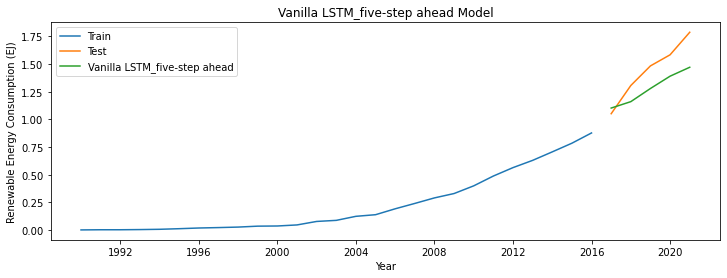

In [56]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat0.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Vanilla LSTM_five-step ahead')
plt.legend(loc='best')
plt.title('Vanilla LSTM_five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Stacked LSTM 

In [57]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X_train, y_train = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X_train.append(seq_x)
        y_train.append(seq_y)
    return array(X_train), array(y_train)

# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:25]
# choose a number of time steps
n_steps = 3
# split into samples
X_train1, y_train1 = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X_train1)):
    print(X_train1[i], y_train1[i])
    
    
raw_seq_test = data['Renewable Energy Consumption (EJ)'][24:32]
X_test1, y_test1 = split_sequence(raw_seq_test, n_steps)    


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train01 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1], n_features))

# define model
model11 = Sequential()
model11.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model11.add(LSTM(50, activation='relu'))
model11.add(Dense(1))
model11.compile(optimizer='adam', loss='mse')
# fit model
model11.fit(X_train01, y_train1, epochs=200, verbose=0)

[0.0008 0.0023 0.0023] 0.0039
[0.0023 0.0023 0.0039] 0.0064
[0.0023 0.0039 0.0064] 0.0118
[0.0039 0.0064 0.0118] 0.0181
[0.0064 0.0118 0.0181] 0.0219
[0.0118 0.0181 0.0219] 0.0264
[0.0181 0.0219 0.0264] 0.0348
[0.0219 0.0264 0.0348] 0.0363
[0.0264 0.0348 0.0363] 0.0459
[0.0348 0.0363 0.0459] 0.0774
[0.0363 0.0459 0.0774] 0.0872
[0.0459 0.0774 0.0872] 0.1237
[0.0774 0.0872 0.1237] 0.1384
[0.0872 0.1237 0.1384] 0.1918
[0.1237 0.1384 0.1918] 0.2403
[0.1384 0.1918 0.2403] 0.2903
[0.1918 0.2403 0.2903] 0.3299
[0.2403 0.2903 0.3299] 0.3994
[0.2903 0.3299 0.3994] 0.488
[0.3299 0.3994 0.488 ] 0.5641
[0.3994 0.488  0.5641] 0.6298
[0.488  0.5641 0.6298] 0.7066


In [58]:
yhat11 = model11.predict(X_test1, verbose=0)
print(yhat11)

[[1.0514104]
 [1.2060158]
 [1.4538374]
 [1.8465354]
 [2.3121696]]


In [59]:
from sklearn.metrics import mean_squared_error
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1,yhat11)).round(2)
mape = np.round(np.mean(np.abs(y_test1-yhat11)/y_test1)*100,2)
mae = mean_absolute_error(y_test1, yhat11).round(2)
mse = mean_squared_error(y_test1, yhat11).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Stacked LSTM_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07


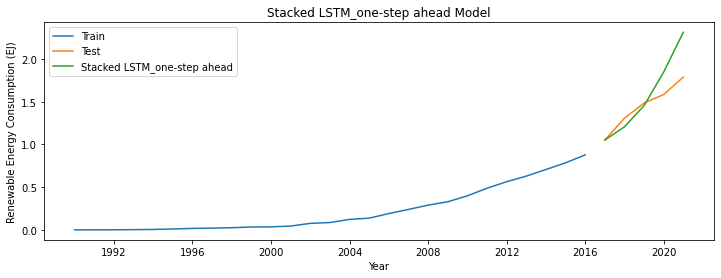

In [60]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat11, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Stacked LSTM_one-step ahead')
plt.legend(loc='best')
plt.title('Stacked LSTM_one-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [61]:
# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()



# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train0 = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))


# define model
model1 = Sequential()
model1.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model1.add(LSTM(100, activation='relu'))
model1.add(Dense(n_steps_out))
model1.compile(optimizer='adam', loss='mse')
# fit model
model1.fit(X_train0, y_train, epochs=1000, verbose=0)

[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [62]:
X_test1 = X_test.values.reshape((1, n_steps_in, n_features))
yhat1 = model1.predict(X_test1, verbose=0)
print(yhat1)

[[1.1824071 1.2264183 1.2881674 1.3972285 1.5322114]]


In [63]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat1)).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat1)/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat1).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat1).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Stacked LSTM_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


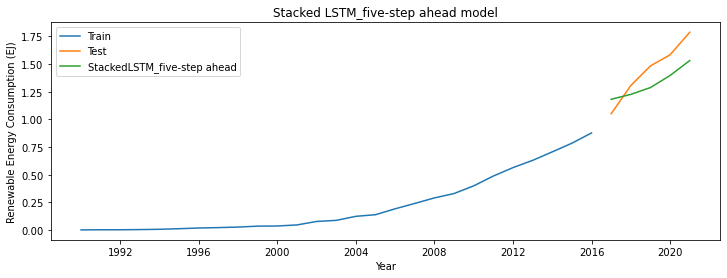

In [64]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat1.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='StackedLSTM_five-step ahead')
plt.legend(loc='best')
plt.title('Stacked LSTM_five-step ahead model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Bidirectional LSTM

In [65]:
from keras.layers import Bidirectional
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X_train, y_train = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X_train.append(seq_x)
        y_train.append(seq_y)
    return array(X_train), array(y_train)

# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:25]
# choose a number of time steps
n_steps = 3
# split into samples
X_train1, y_train1 = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X_train1)):
    print(X_train1[i], y_train1[i])
    
    
raw_seq_test = data['Renewable Energy Consumption (EJ)'][24:32]
X_test1, y_test1 = split_sequence(raw_seq_test, n_steps)    


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train01 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1], n_features))


# define model
model21 = Sequential()
model21.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model21.add(Dense(1))
model21.compile(optimizer='adam', loss='mse')
# fit model
model21.fit(X_train01, y_train1, epochs=200, verbose=0)

[0.0008 0.0023 0.0023] 0.0039
[0.0023 0.0023 0.0039] 0.0064
[0.0023 0.0039 0.0064] 0.0118
[0.0039 0.0064 0.0118] 0.0181
[0.0064 0.0118 0.0181] 0.0219
[0.0118 0.0181 0.0219] 0.0264
[0.0181 0.0219 0.0264] 0.0348
[0.0219 0.0264 0.0348] 0.0363
[0.0264 0.0348 0.0363] 0.0459
[0.0348 0.0363 0.0459] 0.0774
[0.0363 0.0459 0.0774] 0.0872
[0.0459 0.0774 0.0872] 0.1237
[0.0774 0.0872 0.1237] 0.1384
[0.0872 0.1237 0.1384] 0.1918
[0.1237 0.1384 0.1918] 0.2403
[0.1384 0.1918 0.2403] 0.2903
[0.1918 0.2403 0.2903] 0.3299
[0.2403 0.2903 0.3299] 0.3994
[0.2903 0.3299 0.3994] 0.488
[0.3299 0.3994 0.488 ] 0.5641
[0.3994 0.488  0.5641] 0.6298
[0.488  0.5641 0.6298] 0.7066


In [66]:

yhat21 = model21.predict(X_test1, verbose=0)
print(yhat21)

[[0.9495151]
 [1.08016  ]
 [1.2909445]
 [1.5524439]
 [1.7965654]]


In [67]:
from sklearn.metrics import mean_squared_error
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1,yhat21)).round(2)
mape = np.round(np.mean(np.abs(y_test1-yhat21)/y_test1)*100,2)
mae = mean_absolute_error(y_test1, yhat21).round(2)
mse = mean_squared_error(y_test1, yhat21).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Bidirectional LSTM_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


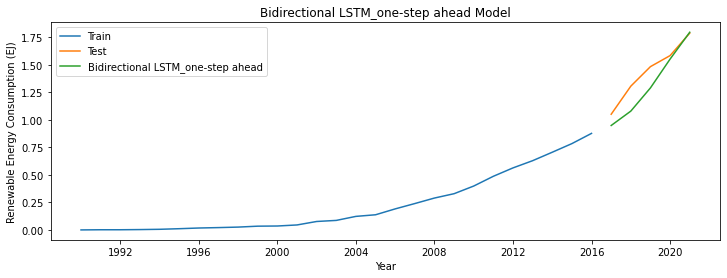

In [68]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat21, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Bidirectional LSTM_one-step ahead')
plt.legend(loc='best')
plt.title('Bidirectional LSTM_one-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [69]:
from keras.layers import Bidirectional

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()



# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train0 = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

# define model
model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps_in, n_features)))
model2.add(Dense(n_steps_out))
model2.compile(optimizer='adam', loss='mse')
# fit model
model2.fit(X_train0, y_train, epochs=1000, verbose=0)


[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [70]:
X_test2 = X_test.values.reshape((1, n_steps_in, n_features))
yhat2 = model2.predict(X_test2, verbose=0)
print(yhat2)

[[1.1071293 1.1996155 1.2778254 1.4049335 1.5163554]]


In [71]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat2)).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat2)/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat2).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat2).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Bidirectional LSTM_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


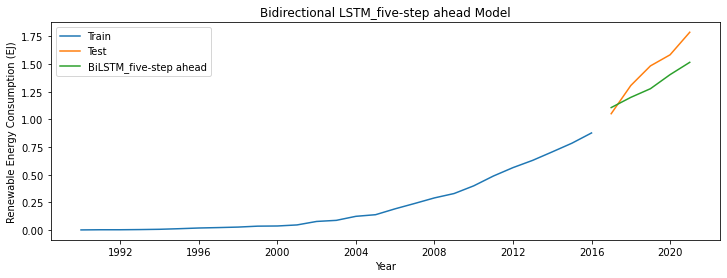

In [72]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat2.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='BiLSTM_five-step ahead')
plt.legend(loc='best')
plt.title('Bidirectional LSTM_five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## CNN LSTM 

In [73]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features_cnn = 1
n_seq_cnn = 1
n_steps_cnn = 3
X_cnn = X_train1.reshape((X_train1.shape[0], n_seq_cnn, n_steps_cnn, n_features_cnn))


# define model
model31 = Sequential()
model31.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_cnn, n_features_cnn)))
model31.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model31.add(TimeDistributed(Flatten()))
model31.add(LSTM(100, activation='relu'))
model31.add(Dense(1))
model31.compile(optimizer='adam', loss='mse')

# fit model
model31.fit(X_cnn, y_train1, epochs=500, verbose=0)

In [74]:
X_test31 = X_test1.reshape((X_test1.shape[0], n_seq_cnn, n_steps_cnn, n_features_cnn))
yhat31 = model31.predict(X_test31, verbose=0)
print(yhat31)

[[1.0066338]
 [1.1313828]
 [1.3776422]
 [1.768255 ]
 [2.0605848]]


In [75]:
from sklearn.metrics import mean_squared_error
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1,yhat31)).round(2)
mape = np.round(np.mean(np.abs(y_test1-yhat31)/y_test1)*100,2)
mae = mean_absolute_error(y_test1, yhat31).round(2)
mse = mean_squared_error(y_test1, yhat31).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['CNN LSTM_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


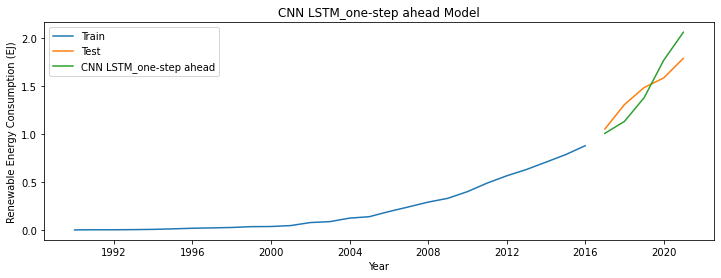

In [76]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat31, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='CNN LSTM_one-step ahead')
plt.legend(loc='best')
plt.title('CNN LSTM_one-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [77]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()



# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features_cnn = 1
n_seq_cnn = 1
n_steps_cnn = 5
X_cnn = X_train.reshape((X_train.shape[0], n_seq_cnn, n_steps_cnn, n_features_cnn))


# define model
model3 = Sequential()
model3.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_cnn, n_features_cnn)))
model3.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model3.add(TimeDistributed(Flatten()))
model3.add(LSTM(100, activation='relu'))
model3.add(Dense(n_steps_out))
model3.compile(optimizer='adam', loss='mse')

# fit model
model3.fit(X_cnn, y_train, epochs=1000, verbose=0)



[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [78]:
X_test3 = X_test.values.reshape((1, 1, n_steps_cnn, n_features))
yhat3 = model3.predict(X_test3, verbose=0)
print(yhat3)

[[1.1804576 1.3127565 1.277927  1.324101  1.3792773]]


In [79]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat3)).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat3)/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat3).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat3).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['CNN LSTM_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


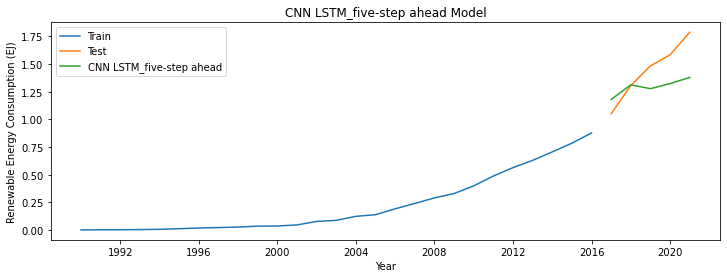

In [80]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat3.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='CNN LSTM_five-step ahead')
plt.legend(loc='best')
plt.title('CNN LSTM_five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## ConvLSTM

In [81]:
from keras.layers import ConvLSTM2D

# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features_Conv = 1
n_seq_Conv = 1
n_steps_Conv = 3
X_Conv = X_train1.reshape((X_train1.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))


# define model
model41 = Sequential()
model41.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq_Conv, 1, n_steps_Conv, n_features_Conv)))
model41.add(Flatten())
model41.add(Dense(1))
model41.compile(optimizer='adam', loss='mse')

# fit model
model41.fit(X_Conv, y_train1, epochs=1000, verbose=0)

In [82]:
X_test41 = X_test1.reshape((X_test1.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))
yhat41 = model41.predict(X_test41, verbose=0)
print(yhat41)

[[1.0452112]
 [1.1938586]
 [1.4318336]
 [1.7179527]
 [1.9470912]]


In [83]:
from sklearn.metrics import mean_squared_error
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1,yhat41)).round(2)
mape = np.round(np.mean(np.abs(y_test1-yhat41)/y_test1)*100,2)
mae = mean_absolute_error(y_test1, yhat41).round(2)
mse = mean_squared_error(y_test1, yhat41).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['ConVLSTM_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


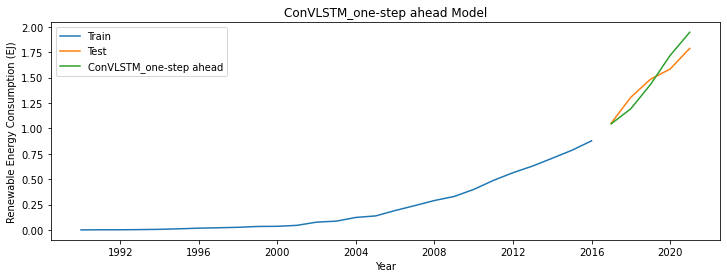

In [84]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat41, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='ConVLSTM_one-step ahead')
plt.legend(loc='best')
plt.title('ConVLSTM_one-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [85]:
from keras.layers import ConvLSTM2D

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()



# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features_Conv = 1
n_seq_Conv = 1
n_steps_Conv = 5
X_Conv = X_train.reshape((X_train.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))


# define model
model4 = Sequential()
model4.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq_Conv, 1, n_steps_Conv, n_features_Conv)))
model4.add(Flatten())
model4.add(Dense(n_steps_out))
model4.compile(optimizer='adam', loss='mse')

# fit model
model4.fit(X_Conv, y_train, epochs=1000, verbose=0)


[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [86]:
X_test4 = X_test.values.reshape((1, n_seq_Conv, 1, n_steps_Conv, n_features_Conv))
yhat4 = model4.predict(X_test4, verbose=0)
print(yhat4)

[[1.1369165 1.3069885 1.4877348 1.6657284 1.8646613]]


In [87]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat4)).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat4)/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat4).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat4).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['ConvLSTM_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


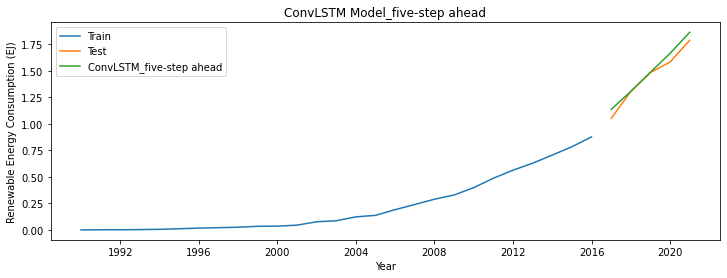

In [88]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat4.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='ConvLSTM_five-step ahead')
plt.legend(loc='best')
plt.title('ConvLSTM Model_five-step ahead')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Encoder-Decoder LSTM

In [89]:
from keras.layers import RepeatVector

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:25]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 1
# split into samples
X_train1, y_train1 = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train1)):
    print(X_train1[i], y_train1[i])

raw_seq_test = data['Renewable Energy Consumption (EJ)'][24:32]
X_test1, y_test1 = split_sequence_multi(raw_seq_test, n_steps_in, n_steps_out) 
for i in range(len(X_test1)):
    print(X_test1[i], y_test1[i])


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features_ed = 1
X_ed1 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1], n_features_ed))
y_ed1 = y_train1.reshape((y_train1.shape[0], y_train1.shape[1], n_features_ed))

# define model
model51 = Sequential()
model51.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features_ed)))
model51.add(RepeatVector(n_steps_out))
model51.add(LSTM(100, activation='relu', return_sequences=True))
model51.add(TimeDistributed(Dense(1)))
model51.compile(optimizer='adam', loss='mse')

# fit model
model51.fit(X_ed1, y_ed1, epochs=1000, verbose=0)


[0.0008 0.0023 0.0023] [0.0039]
[0.0023 0.0023 0.0039] [0.0064]
[0.0023 0.0039 0.0064] [0.0118]
[0.0039 0.0064 0.0118] [0.0181]
[0.0064 0.0118 0.0181] [0.0219]
[0.0118 0.0181 0.0219] [0.0264]
[0.0181 0.0219 0.0264] [0.0348]
[0.0219 0.0264 0.0348] [0.0363]
[0.0264 0.0348 0.0363] [0.0459]
[0.0348 0.0363 0.0459] [0.0774]
[0.0363 0.0459 0.0774] [0.0872]
[0.0459 0.0774 0.0872] [0.1237]
[0.0774 0.0872 0.1237] [0.1384]
[0.0872 0.1237 0.1384] [0.1918]
[0.1237 0.1384 0.1918] [0.2403]
[0.1384 0.1918 0.2403] [0.2903]
[0.1918 0.2403 0.2903] [0.3299]
[0.2403 0.2903 0.3299] [0.3994]
[0.2903 0.3299 0.3994] [0.488]
[0.3299 0.3994 0.488 ] [0.5641]
[0.3994 0.488  0.5641] [0.6298]
[0.488  0.5641 0.6298] [0.7066]
[0.7066 0.7849 0.8777] [1.0517]
[0.7849 0.8777 1.0517] [1.3068]
[0.8777 1.0517 1.3068] [1.4841]
[1.0517 1.3068 1.4841] [1.5843]
[1.3068 1.4841 1.5843] [1.7884]


In [90]:
X_test51 = X_test1.reshape((X_test1.shape[0], n_steps_in, n_features_ed))
yhat51 = model51.predict(X_test51, verbose=0)
print(yhat51)

[[[0.95968384]]

 [[1.0911508 ]]

 [[1.3048314 ]]

 [[1.6060815 ]]

 [[1.9296479 ]]]


In [91]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1.reshape(1,5),yhat51.reshape(1,5))).round(2)
mape = np.round(np.mean(np.abs(y_test1.reshape(1,5)-yhat51.reshape(1,5))/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test1.reshape(1,5), yhat51.reshape(1,5)).round(2)
mse = mean_squared_error(y_test1.reshape(1,5), yhat51.reshape(1,5)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Encoder Decoder LSTM_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


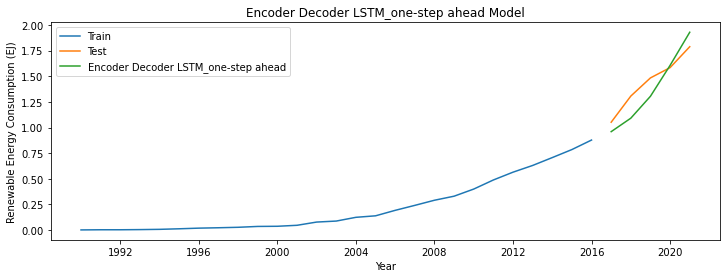

In [92]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat51.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Encoder Decoder LSTM_one-step ahead')
plt.legend(loc='best')
plt.title('Encoder Decoder LSTM_one-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [93]:
from keras.layers import RepeatVector

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features_ed = 1
X_ed = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features_ed))
y_ed = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features_ed))

# define model
model5 = Sequential()
model5.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features_ed)))
model5.add(RepeatVector(n_steps_out))
model5.add(LSTM(100, activation='relu', return_sequences=True))
model5.add(TimeDistributed(Dense(1)))
model5.compile(optimizer='adam', loss='mse')

# fit model
model5.fit(X_ed, y_ed, epochs=1000, verbose=0)



[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [94]:
X_test5 = X_test.values.reshape((1, n_steps_in, n_features_ed))
yhat5 = model5.predict(X_test5, verbose=0)
print(yhat5)

[[[1.3044634 ]
  [0.90072346]
  [1.3010569 ]
  [1.4303244 ]
  [1.7051361 ]]]


In [95]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat5.reshape(1,5))).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat5.reshape(1,5))/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat5.reshape(1,5)).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat5.reshape(1,5)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Encoder Decoder LSTM_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


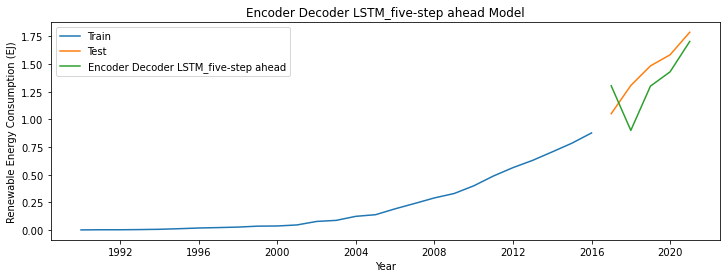

In [96]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat5.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Encoder Decoder LSTM_five-step ahead')
plt.legend(loc='best')
plt.title('Encoder Decoder LSTM_five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Attention Mechanism

In [97]:
import tensorflow as tf
import numpy as np

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:25]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 1
# split into samples
X_train1, y_train1 = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train1)):
    print(X_train1[i], y_train1[i])
    
raw_seq_test = data['Renewable Energy Consumption (EJ)'][24:32]
X_test1, y_test1 = split_sequence_multi(raw_seq_test, n_steps_in, n_steps_out) 
for i in range(len(X_test1)):
    print(X_test1[i], y_test1[i])    
    


T = 3  # Sequence length
D = 1   # Number of features



# Define the Attention layer
class Attention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, inputs):
        # Compute attention scores
        score = tf.nn.tanh(self.W(inputs))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # Apply attention weights to input
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector

# Build the model
def build_model(T, D):
    inputs = tf.keras.Input(shape=(T, D))
    x = tf.keras.layers.LSTM(64, return_sequences=True)(inputs)
    x = Attention(64)(x)
    x = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

# Build and compile the model
model61 = build_model(T, D)
model61.compile(optimizer="adam", loss="mse")

# Train the model
model61.fit(X_train1, y_train1, epochs=1000, batch_size=32)

[0.0008 0.0023 0.0023] [0.0039]
[0.0023 0.0023 0.0039] [0.0064]
[0.0023 0.0039 0.0064] [0.0118]
[0.0039 0.0064 0.0118] [0.0181]
[0.0064 0.0118 0.0181] [0.0219]
[0.0118 0.0181 0.0219] [0.0264]
[0.0181 0.0219 0.0264] [0.0348]
[0.0219 0.0264 0.0348] [0.0363]
[0.0264 0.0348 0.0363] [0.0459]
[0.0348 0.0363 0.0459] [0.0774]
[0.0363 0.0459 0.0774] [0.0872]
[0.0459 0.0774 0.0872] [0.1237]
[0.0774 0.0872 0.1237] [0.1384]
[0.0872 0.1237 0.1384] [0.1918]
[0.1237 0.1384 0.1918] [0.2403]
[0.1384 0.1918 0.2403] [0.2903]
[0.1918 0.2403 0.2903] [0.3299]
[0.2403 0.2903 0.3299] [0.3994]
[0.2903 0.3299 0.3994] [0.488]
[0.3299 0.3994 0.488 ] [0.5641]
[0.3994 0.488  0.5641] [0.6298]
[0.488  0.5641 0.6298] [0.7066]
[0.7066 0.7849 0.8777] [1.0517]
[0.7849 0.8777 1.0517] [1.3068]
[0.8777 1.0517 1.3068] [1.4841]
[1.0517 1.3068 1.4841] [1.5843]
[1.3068 1.4841 1.5843] [1.7884]
Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.0944
Epoch 2/1000
1/1 [==============================] - 0s 6ms/

In [98]:
X_test61 = X_test1.reshape((X_test1.shape[0], T, D))
yhat61 = model61.predict(X_test61, verbose=0)
print(yhat61)

[[0.8974225]
 [0.9690292]
 [1.0627629]
 [1.1617823]
 [1.2373203]]


In [99]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1,yhat61)).round(2)
mape = np.round(np.mean(np.abs(y_test1-yhat61)/y_test1)*100,2)
mae = mean_absolute_error(y_test1, yhat61).round(2)
mse = mean_squared_error(y_test1, yhat61).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Attention Model_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


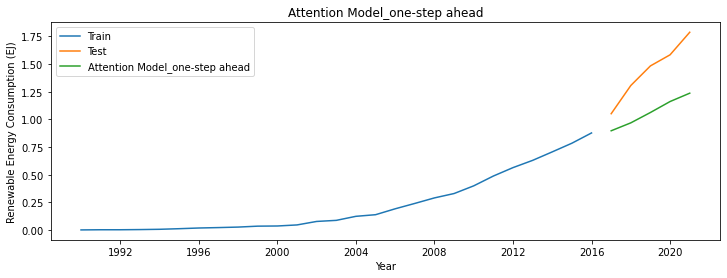

In [100]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat61.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Attention Model_one-step ahead')
plt.legend(loc='best')
plt.title('Attention Model_one-step ahead')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [101]:
import tensorflow as tf
import numpy as np

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()


T = 5  # Sequence length
D = 1   # Number of features



# Define the Attention layer
class Attention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, inputs):
        # Compute attention scores
        score = tf.nn.tanh(self.W(inputs))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # Apply attention weights to input
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector

# Build the model
def build_model(T, D):
    inputs = tf.keras.Input(shape=(T, D))
    x = tf.keras.layers.LSTM(64, return_sequences=True)(inputs)
    x = Attention(64)(x)
    x = tf.keras.layers.Dense(5)(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

# Build and compile the model
model6 = build_model(T, D)
model6.compile(optimizer="adam", loss="mse")

# Train the model
model6.fit(X_train, y_train, epochs=1000, batch_size=32)

[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [102]:
X_test6 = X_test.values.reshape((1, T, D))
yhat6 = model6.predict(X_test6, verbose=0)
print(yhat6)

[[0.8578038  0.93535286 0.9491145  1.0580602  1.159932  ]]


In [103]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat6)).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat6)/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat6).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat6).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Attention Model_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


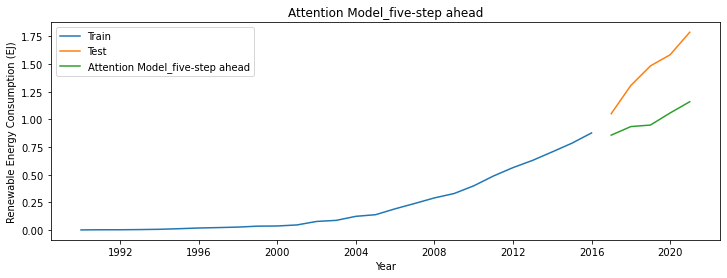

In [104]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat6.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Attention Model_five-step ahead')
plt.legend(loc='best')
plt.title('Attention Model_five-step ahead')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## ConvLSTM-BiLSTM

In [105]:
from keras.layers import ConvLSTM2D

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:25]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 1
# split into samples
X_train1, y_train1 = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train1)):
    print(X_train1[i], y_train1[i])

    
raw_seq_test = data['Renewable Energy Consumption (EJ)'][24:32]
X_test1, y_test1 = split_sequence_multi(raw_seq_test, n_steps_in, n_steps_out) 
for i in range(len(X_test1)):
    print(X_test1[i], y_test1[i])



# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features_Conv = 1
n_seq_Conv = 1
n_steps_Conv = 3
X_Conv = X_train1.reshape((X_train1.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))


# define model
model71 = Sequential()
model71.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq_Conv, 1, n_steps_Conv, n_features_Conv)))
model71.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model71.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(1, n_steps_Conv, n_features_Conv)))
model71.add(Reshape((1,64), input_shape = (128,))) 
model71.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
model71.add(Flatten())
model71.add(Dense(n_steps_out))
model71.compile(optimizer='adam', loss='mse')

model71.summary()

# fit model
model71.fit(X_Conv, y_train1, epochs=1000, verbose=0)

[0.0008 0.0023 0.0023] [0.0039]
[0.0023 0.0023 0.0039] [0.0064]
[0.0023 0.0039 0.0064] [0.0118]
[0.0039 0.0064 0.0118] [0.0181]
[0.0064 0.0118 0.0181] [0.0219]
[0.0118 0.0181 0.0219] [0.0264]
[0.0181 0.0219 0.0264] [0.0348]
[0.0219 0.0264 0.0348] [0.0363]
[0.0264 0.0348 0.0363] [0.0459]
[0.0348 0.0363 0.0459] [0.0774]
[0.0363 0.0459 0.0774] [0.0872]
[0.0459 0.0774 0.0872] [0.1237]
[0.0774 0.0872 0.1237] [0.1384]
[0.0872 0.1237 0.1384] [0.1918]
[0.1237 0.1384 0.1918] [0.2403]
[0.1384 0.1918 0.2403] [0.2903]
[0.1918 0.2403 0.2903] [0.3299]
[0.2403 0.2903 0.3299] [0.3994]
[0.2903 0.3299 0.3994] [0.488]
[0.3299 0.3994 0.488 ] [0.5641]
[0.3994 0.488  0.5641] [0.6298]
[0.488  0.5641 0.6298] [0.7066]
[0.7066 0.7849 0.8777] [1.0517]
[0.7849 0.8777 1.0517] [1.3068]
[0.8777 1.0517 1.3068] [1.4841]
[1.0517 1.3068 1.4841] [1.5843]
[1.3068 1.4841 1.5843] [1.7884]
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape       

In [106]:
X_test71 = X_test1.reshape((X_test1.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))
yhat71 = model71.predict(X_test71, verbose=0)
print(yhat71)

[[0.9638328]
 [1.1403021]
 [1.4620622]
 [1.8285741]
 [2.0923154]]


In [107]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1,yhat71)).round(2)
mape = np.round(np.mean(np.abs(y_test1-yhat71)/y_test1)*100,2)
mae = mean_absolute_error(y_test1, yhat71).round(2)
mse = mean_squared_error(y_test1, yhat71).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['ConvLSTM-BiLSTM_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


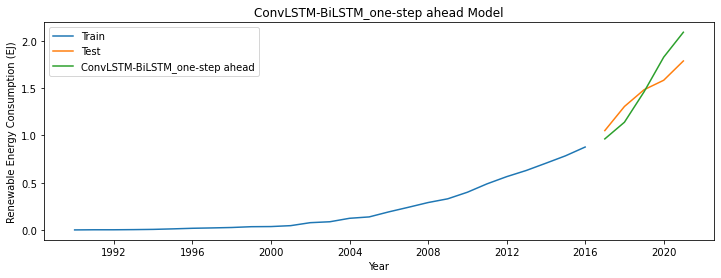

In [108]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat71.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='ConvLSTM-BiLSTM_one-step ahead')
plt.legend(loc='best')
plt.title('ConvLSTM-BiLSTM_one-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [109]:
from keras.layers import ConvLSTM2D

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()



# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features_Conv = 1
n_seq_Conv = 1
n_steps_Conv = 5
X_Conv = X_train.reshape((X_train.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))


# define model
model7 = Sequential()
model7.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq_Conv, 1, n_steps_Conv, n_features_Conv)))
model7.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model7.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(1, n_steps_Conv, n_features_Conv)))
model7.add(Reshape((2,64), input_shape = (128,))) 
model7.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
model7.add(Flatten())
model7.add(Dense(n_steps_out))
model7.compile(optimizer='adam', loss='mse')

model7.summary()

# fit model
model7.fit(X_Conv, y_train, epochs=1000, verbose=0)


[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [110]:
X_test7 = X_test.values.reshape((1, n_seq_Conv, 1, n_steps_Conv, n_features_Conv))
yhat7 = model7.predict(X_test7, verbose=0)
print(yhat7)

[[1.1927097 1.1908435 1.2400956 1.352155  1.5454581]]


In [111]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat7)).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat7)/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat7).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat7).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['ConvLSTM-BiLSTM_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


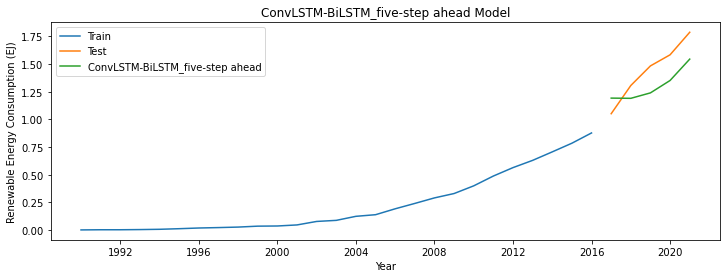

In [112]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat7.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='ConvLSTM-BiLSTM_five-step ahead')
plt.legend(loc='best')
plt.title('ConvLSTM-BiLSTM_five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## ConvLSTM-BiGRU

In [113]:
from keras.layers import ConvLSTM2D

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:25]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 1
# split into samples
X_train1, y_train1 = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train1)):
    print(X_train1[i], y_train1[i])

    
raw_seq_test = data['Renewable Energy Consumption (EJ)'][24:32]
X_test1, y_test1 = split_sequence_multi(raw_seq_test, n_steps_in, n_steps_out) 
for i in range(len(X_test1)):
    print(X_test1[i], y_test1[i])



# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features_Conv = 1
n_seq_Conv = 1
n_steps_Conv = 3
X_Conv = X_train1.reshape((X_train1.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))


# define model
model81 = Sequential()
model81.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq_Conv, 1, n_steps_Conv, n_features_Conv)))
model81.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model81.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(1, n_steps_Conv, n_features_Conv)))
model81.add(Reshape((1,64), input_shape = (128,))) 
model81.add(Bidirectional(GRU(100, activation='relu', return_sequences=True)))
model81.add(Flatten())
model81.add(Dense(n_steps_out))
model81.compile(optimizer='adam', loss='mse')

model81.summary()

# fit model
model81.fit(X_Conv, y_train1, epochs=1000, verbose=0)

[0.0008 0.0023 0.0023] [0.0039]
[0.0023 0.0023 0.0039] [0.0064]
[0.0023 0.0039 0.0064] [0.0118]
[0.0039 0.0064 0.0118] [0.0181]
[0.0064 0.0118 0.0181] [0.0219]
[0.0118 0.0181 0.0219] [0.0264]
[0.0181 0.0219 0.0264] [0.0348]
[0.0219 0.0264 0.0348] [0.0363]
[0.0264 0.0348 0.0363] [0.0459]
[0.0348 0.0363 0.0459] [0.0774]
[0.0363 0.0459 0.0774] [0.0872]
[0.0459 0.0774 0.0872] [0.1237]
[0.0774 0.0872 0.1237] [0.1384]
[0.0872 0.1237 0.1384] [0.1918]
[0.1237 0.1384 0.1918] [0.2403]
[0.1384 0.1918 0.2403] [0.2903]
[0.1918 0.2403 0.2903] [0.3299]
[0.2403 0.2903 0.3299] [0.3994]
[0.2903 0.3299 0.3994] [0.488]
[0.3299 0.3994 0.488 ] [0.5641]
[0.3994 0.488  0.5641] [0.6298]
[0.488  0.5641 0.6298] [0.7066]
[0.7066 0.7849 0.8777] [1.0517]
[0.7849 0.8777 1.0517] [1.3068]
[0.8777 1.0517 1.3068] [1.4841]
[1.0517 1.3068 1.4841] [1.5843]
[1.3068 1.4841 1.5843] [1.7884]
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape       

In [114]:
X_test81 = X_test1.reshape((X_test1.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))
yhat81 = model81.predict(X_test81, verbose=0)
print(yhat81)

[[0.9343212]
 [1.0737543]
 [1.3198678]
 [1.5903896]
 [1.7751615]]


In [115]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test1,yhat81)).round(2)
mape = np.round(np.mean(np.abs(y_test1-yhat81)/y_test1)*100,2)
mae = mean_absolute_error(y_test1, yhat81).round(2)
mse = mean_squared_error(y_test1, yhat81).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['ConvLSTM-BiGRU_one-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


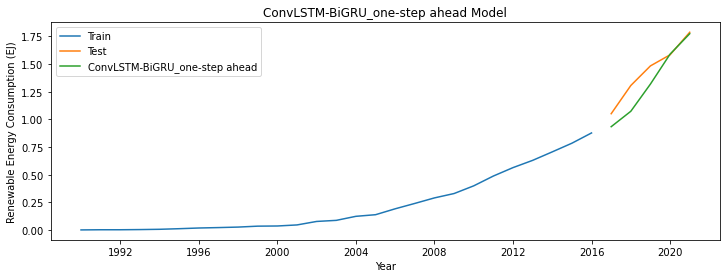

In [116]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test1, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat81.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='ConvLSTM-BiGRU_one-step ahead')
plt.legend(loc='best')
plt.title('ConvLSTM-BiGRU_one-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [117]:
from keras.layers import ConvLSTM2D

# split a univariate sequence into samples
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



# define input sequence
raw_seq = data['Renewable Energy Consumption (EJ)'][:27]
# choose a number of time steps
n_steps_in, n_steps_out = 5, 5
# split into samples
X_train, y_train = split_sequence_multi(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

X_test = data['Renewable Energy Consumption (EJ)'][22:27]
y_test = data['Renewable Energy Consumption (EJ)'][27:].to_numpy()



# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features_Conv = 1
n_seq_Conv = 1
n_steps_Conv = 5
X_Conv = X_train.reshape((X_train.shape[0], n_seq_Conv, 1, n_steps_Conv, n_features_Conv))


# define model
model8 = Sequential()
model8.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq_Conv, 1, n_steps_Conv, n_features_Conv)))
model8.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model8.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(1, n_steps_Conv, n_features_Conv)))
model8.add(Reshape((2,64), input_shape = (128,))) 
model8.add(Bidirectional(GRU(100, activation='relu', return_sequences=True)))
model8.add(Flatten())
model8.add(Dense(n_steps_out))
model8.compile(optimizer='adam', loss='mse')

model8.summary()

# fit model
model8.fit(X_Conv, y_train, epochs=1000, verbose=0)


[0.0008 0.0023 0.0023 0.0039 0.0064] [0.0118 0.0181 0.0219 0.0264 0.0348]
[0.0023 0.0023 0.0039 0.0064 0.0118] [0.0181 0.0219 0.0264 0.0348 0.0363]
[0.0023 0.0039 0.0064 0.0118 0.0181] [0.0219 0.0264 0.0348 0.0363 0.0459]
[0.0039 0.0064 0.0118 0.0181 0.0219] [0.0264 0.0348 0.0363 0.0459 0.0774]
[0.0064 0.0118 0.0181 0.0219 0.0264] [0.0348 0.0363 0.0459 0.0774 0.0872]
[0.0118 0.0181 0.0219 0.0264 0.0348] [0.0363 0.0459 0.0774 0.0872 0.1237]
[0.0181 0.0219 0.0264 0.0348 0.0363] [0.0459 0.0774 0.0872 0.1237 0.1384]
[0.0219 0.0264 0.0348 0.0363 0.0459] [0.0774 0.0872 0.1237 0.1384 0.1918]
[0.0264 0.0348 0.0363 0.0459 0.0774] [0.0872 0.1237 0.1384 0.1918 0.2403]
[0.0348 0.0363 0.0459 0.0774 0.0872] [0.1237 0.1384 0.1918 0.2403 0.2903]
[0.0363 0.0459 0.0774 0.0872 0.1237] [0.1384 0.1918 0.2403 0.2903 0.3299]
[0.0459 0.0774 0.0872 0.1237 0.1384] [0.1918 0.2403 0.2903 0.3299 0.3994]
[0.0774 0.0872 0.1237 0.1384 0.1918] [0.2403 0.2903 0.3299 0.3994 0.488 ]
[0.0872 0.1237 0.1384 0.1918 0.2403] [

In [118]:
X_test8 = X_test.values.reshape((1, n_seq_Conv, 1, n_steps_Conv, n_features_Conv))
yhat8 = model8.predict(X_test8, verbose=0)
print(yhat8)

[[1.1646017 1.088413  1.1443886 1.293462  1.5068305]]


In [119]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat8)).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat8)/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat8).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat8).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['ConvLSTM-BiGRU_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


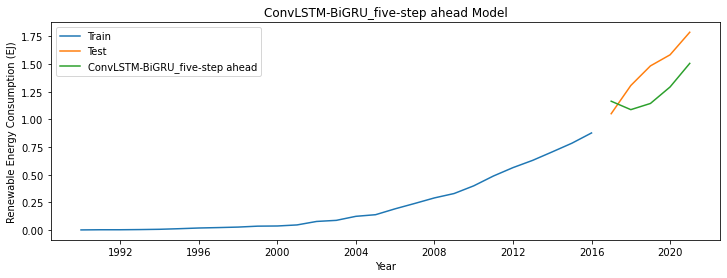

In [120]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat8.reshape(5,1), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='ConvLSTM-BiGRU_five-step ahead')
plt.legend(loc='best')
plt.title('ConvLSTM-BiGRU_five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Random Forest 

In [121]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import numpy as np
from datetime import timedelta
import calendar
REC_data=data['Renewable Energy Consumption (EJ)']
REC_data.head()

Year
1990-01-01    0.0008
1991-01-01    0.0023
1992-01-01    0.0023
1993-01-01    0.0039
1994-01-01    0.0064
Name: Renewable Energy Consumption (EJ), dtype: float64

In [122]:
#Create lag variable
dataframe = DataFrame()
for i in range(5, 0, -1):
   dataframe['t-' + str(i)] = REC_data.shift(i)
final_data = pd.concat([REC_data, dataframe], axis=1)
final_data.dropna(inplace=True)

In [123]:
finaldf = final_data.copy()
finaldf = finaldf.reset_index(drop=True)
test_length=5
end_point = len(finaldf)
x = end_point - test_length
finaldf_train = finaldf.loc[:x - 1, :]
finaldf_test = finaldf.loc[x:, :]
finaldf_test_x = finaldf_test.loc[:, finaldf_test.columns != 'Renewable Energy Consumption (EJ)']
finaldf_test_y = finaldf_test['Renewable Energy Consumption (EJ)']
finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'Renewable Energy Consumption (EJ)']
finaldf_train_y = finaldf_train['Renewable Energy Consumption (EJ)']


In [124]:
regressor_rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10],
    'max_features': [1, 2, 3, 4],
    'n_estimators': [10, 20, 30, 40, 50, 100]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=regressor_rf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "neg_root_mean_squared_error")

In [127]:
grid_search.fit(finaldf_train_x, finaldf_train_y)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [128]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.136415,0.032880,0.056984,0.010408,1,1,1,10,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",-0.190638,-0.057526,-0.190373,-0.400752,-0.209822,0.122876,473
1,0.158851,0.012812,0.075816,0.020235,1,1,1,20,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",-0.178618,-0.054348,-0.183191,-0.385628,-0.200446,0.118755,458
2,0.224813,0.020637,0.076065,0.013030,1,1,1,30,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",-0.177214,-0.055913,-0.183435,-0.376814,-0.198344,0.114899,433
3,0.244519,0.035283,0.091773,0.029742,1,1,1,40,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",-0.174865,-0.052816,-0.189449,-0.382951,-0.200020,0.118192,449
4,0.260102,0.029834,0.103238,0.027376,1,1,1,50,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",-0.172954,-0.052990,-0.191504,-0.380901,-0.199587,0.117410,441


In [129]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
614,0.207359,0.019678,0.139901,0.025022,10,2,1,30,"{'max_depth': 10, 'max_features': 2, 'min_samp...",-0.038837,-0.046572,-0.097634,-0.276731,-0.114944,0.096101,1
470,0.253144,0.018445,0.146761,0.038648,5,2,1,30,"{'max_depth': 5, 'max_features': 2, 'min_sampl...",-0.038837,-0.046572,-0.097634,-0.276731,-0.114944,0.096101,2
542,0.228063,0.009707,0.166211,0.010093,5,4,1,30,"{'max_depth': 5, 'max_features': 4, 'min_sampl...",-0.038837,-0.047377,-0.097634,-0.276731,-0.115145,0.095959,3
686,0.240029,0.023545,0.146129,0.010929,10,4,1,30,"{'max_depth': 10, 'max_features': 4, 'min_samp...",-0.038837,-0.047377,-0.097634,-0.276731,-0.115145,0.095959,3
434,0.214357,0.014805,0.136422,0.016759,5,1,1,30,"{'max_depth': 5, 'max_features': 1, 'min_sampl...",-0.038837,-0.048081,-0.097634,-0.276731,-0.115321,0.095835,5


In [130]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features=2, n_estimators=30, n_jobs=-1,
                      random_state=42)

In [131]:
rf_best = grid_search.best_estimator_

In [132]:
yhat9 = rf_best.predict(finaldf_test_x)

In [133]:
y_test = np.array(finaldf_test_y)
sumvalue=np.sum(y_test)
mape=np.sum(np.abs((y_test - yhat9)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 55.33 %.


In [134]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat9.reshape(1,5))).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat9.reshape(1,5))/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat9.reshape(1,5)).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat9.reshape(1,5)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Random Forest Regression_One-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


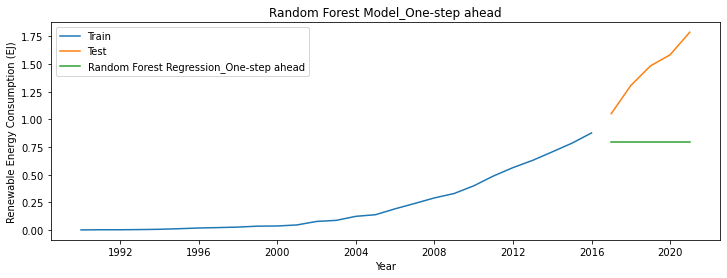

In [135]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat9, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Random Forest Regression_One-step ahead')
plt.legend(loc='best')
plt.title('Random Forest Model_One-step ahead')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [136]:
#n-Steps forecasting using Random Forest


# Function to forecast using the regression model
def forecast_next_n_years(model, initial_data, n_years):
    forecasted_values = []
    input_data = initial_data.copy()

    for _ in range(n_years):
        # Predict the next value
        next_value = model.predict(input_data)
        
        # Store the forecasted value
        forecasted_values.append(next_value[0])
        
        # Prepare the input for the next prediction
        input_data = np.roll(input_data, shift=-1)  # Shift data
        input_data[-1] = next_value  # Append the predicted value

    return forecasted_values

# Initial data for forecasting (last n values from the dataset)
initial_data = finaldf_test_x[0:1]

# Forecast for the next 5 years
forecasts = forecast_next_n_years(rf_best, initial_data, 5)

# Inverse transform to original scale
#forecasts_original_scale = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

#forecasts_original_scale.flatten()  # Display the forecasts for the next 5 years

In [137]:
forecasts

[0.7985166666666671,
 0.7985166666666671,
 0.7985166666666671,
 0.7985166666666671,
 0.7985166666666671]

In [138]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test,np.array(forecasts))).round(2)
mape = np.round(np.mean(np.abs(y_test-np.array(forecasts))/y_test)*100,2)
mae = mean_absolute_error(y_test, np.array(forecasts)).round(2)
mse = mean_squared_error(y_test, np.array(forecasts)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Random Forest Regression_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


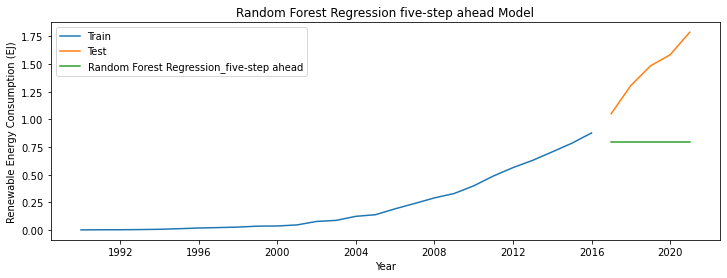

In [139]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=np.array(forecasts), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Random Forest Regression_five-step ahead')
plt.legend(loc='best')
plt.title('Random Forest Regression five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## XGBoost

In [140]:
import xgboost as xg

In [141]:
regressor_xgb = xg.XGBRegressor(random_state=42, n_jobs=-1)

In [142]:
# Create the parameter grid based on the results of random search 
params = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [1, 2, 3, 5, 10],
    'min_child_weight': [1, 2, 3, 7, 10],
    'max_features': [1, 2, 3, 4],
    'n_estimators': [10, 20, 30, 40, 50, 100]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=regressor_xgb, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "neg_root_mean_squared_error")

In [143]:
grid_search.fit(finaldf_train_x, finaldf_train_y)

Fitting 4 folds for each of 3000 candidates, totalling 12000 fits
[21:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    valid

In [144]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.331795,0.284363,0.009974,0.000001,0.1,1,1,1,10,"{'learning_rate': 0.1, 'max_depth': 1, 'max_fe...",-0.273501,-0.154126,-0.102524,-0.304130,-0.208570,0.083003,2329
1,0.858359,0.211993,0.052118,0.033962,0.1,1,1,1,20,"{'learning_rate': 0.1, 'max_depth': 1, 'max_fe...",-0.178506,-0.056262,-0.116658,-0.319760,-0.167796,0.097804,1717
2,1.526672,0.724786,0.023438,0.016350,0.1,1,1,1,30,"{'learning_rate': 0.1, 'max_depth': 1, 'max_fe...",-0.130577,-0.040397,-0.125219,-0.308283,-0.151119,0.097535,1669
3,0.592402,0.207172,0.012218,0.001475,0.1,1,1,1,40,"{'learning_rate': 0.1, 'max_depth': 1, 'max_fe...",-0.098660,-0.049932,-0.125759,-0.295745,-0.142524,0.092541,1425
4,0.237908,0.030373,0.009725,0.000826,0.1,1,1,1,50,"{'learning_rate': 0.1, 'max_depth': 1, 'max_fe...",-0.082183,-0.058644,-0.127722,-0.284372,-0.138230,0.087953,1037


In [145]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=2, max_features=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
xgb_best = grid_search.best_estimator_

In [147]:
yhat10 = xgb_best.predict(finaldf_test_x)

In [148]:
y_test = np.array(finaldf_test_y)
sumvalue=np.sum(y_test)
mape=np.sum(np.abs((y_test - yhat10)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 60.73 %.


In [149]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat10.reshape(1,5))).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat10.reshape(1,5))/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat10.reshape(1,5)).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat10.reshape(1,5)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['XGBoost Regression_One-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results


,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


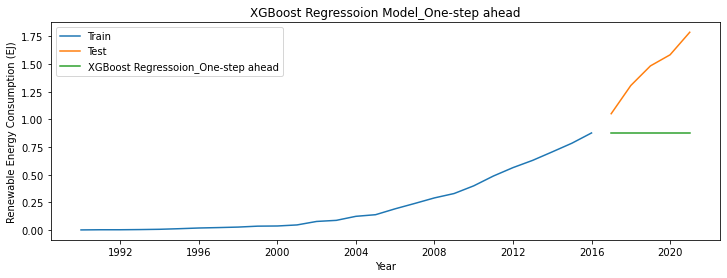

In [150]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat10, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='XGBoost Regressoion_One-step ahead')
plt.legend(loc='best')
plt.title('XGBoost Regressoion Model_One-step ahead')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [151]:
#n-Steps forecasting using XGBoost

# Function to forecast using the regression model
def forecast_next_n_years(model, initial_data, n_years):
    forecasted_values = []
    input_data = initial_data.copy()

    for _ in range(n_years):
        # Predict the next value
        next_value = model.predict(input_data)
        
        # Store the forecasted value
        forecasted_values.append(next_value[0])
        
        # Prepare the input for the next prediction
        input_data = np.roll(input_data, shift=-1)  # Shift data
        input_data[-1] = next_value  # Append the predicted value

    return forecasted_values

# Initial data for forecasting (last n values from the dataset)
initial_data = finaldf_test_x[0:1]

# Forecast for the next 5 years
forecasts = forecast_next_n_years(xgb_best, initial_data, 5)

# Inverse transform to original scale
#forecasts_original_scale = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

#forecasts_original_scale.flatten()  # Display the forecasts for the next 5 years

In [152]:
forecasts

[0.8764179, 0.8764179, 0.8764179, 0.8764179, 0.8764179]

In [153]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test,np.array(forecasts))).round(2)
mape = np.round(np.mean(np.abs(y_test-np.array(forecasts))/y_test)*100,2)
mae = mean_absolute_error(y_test, np.array(forecasts)).round(2)
mse = mean_squared_error(y_test, np.array(forecasts)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['XGBoost Regression_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


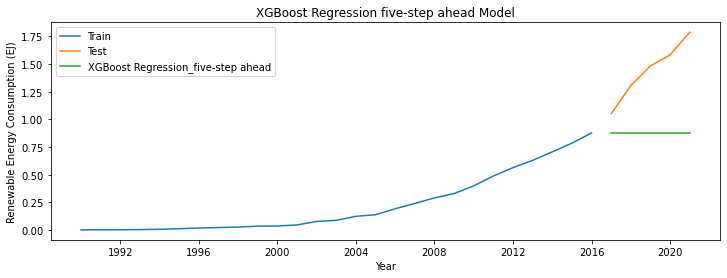

In [154]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=np.array(forecasts), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='XGBoost Regression_five-step ahead')
plt.legend(loc='best')
plt.title('XGBoost Regression five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Support Vector Regression 

In [155]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

SVR = SVR(kernel='linear', C=1.0, epsilon=0.1)
SVR.fit(finaldf_train_x, finaldf_train_y)

SVR(kernel='linear')

In [156]:
yhat11 = SVR.predict(finaldf_test_x)

In [157]:
y_test = np.array(finaldf_test_y)
sumvalue=np.sum(y_test)
mape=np.sum(np.abs((y_test - yhat11)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 78.55 %.


In [158]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat11.reshape(1,5))).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat11.reshape(1,5))/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat11.reshape(1,5)).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat11.reshape(1,5)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Support Vector Regression_One-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


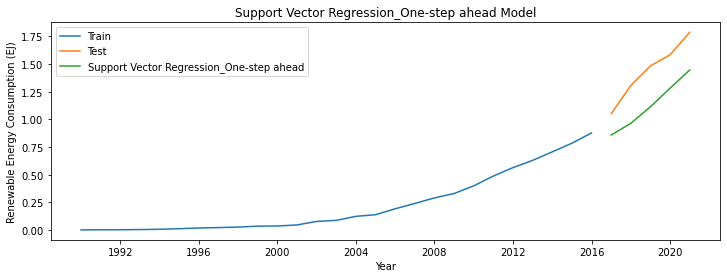

In [159]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat11, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Support Vector Regression_One-step ahead')
plt.legend(loc='best')
plt.title('Support Vector Regression_One-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [160]:
#n-Steps forecasting using SVM




# Function to forecast using the regression model
def forecast_next_n_years(model, initial_data, n_years):
    forecasted_values = []
    input_data = initial_data.copy()

    for _ in range(n_years):
        # Predict the next value
        next_value = model.predict(input_data)
        
        # Store the forecasted value
        forecasted_values.append(next_value[0])
        
        # Prepare the input for the next prediction
        input_data = np.roll(input_data, shift=-1)  # Shift data
        input_data[-1] = next_value  # Append the predicted value

    return forecasted_values

# Initial data for forecasting (last n values from the dataset)
initial_data = finaldf_test_x[0:1]

# Forecast for the next 5 years
forecasts = forecast_next_n_years(SVR, initial_data, 5)

# Inverse transform to original scale
#forecasts_original_scale = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

#forecasts_original_scale.flatten()  # Display the forecasts for the next 5 years

In [161]:
forecasts

[0.8588618827734866,
 0.990684779052907,
 1.1261226516575737,
 1.265274634002098,
 1.4082425780344943]

In [162]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test,np.array(forecasts))).round(2)
mape = np.round(np.mean(np.abs(y_test-np.array(forecasts))/y_test)*100,2)
mae = mean_absolute_error(y_test, np.array(forecasts)).round(2)
mse = mean_squared_error(y_test, np.array(forecasts)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Support Vector Regression_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


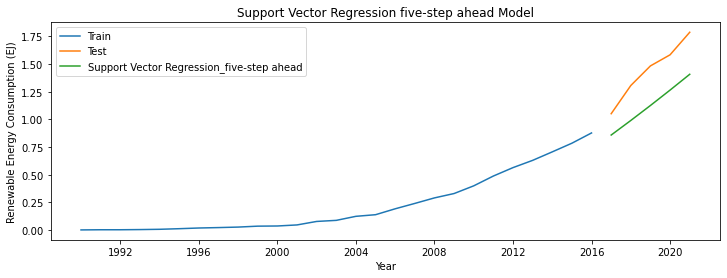

In [163]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=np.array(forecasts), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Support Vector Regression_five-step ahead')
plt.legend(loc='best')
plt.title('Support Vector Regression five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Multi-layer Perceptron Regression 

In [164]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

MLPRegressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
MLPRegressor.fit(finaldf_train_x, finaldf_train_y)

MLPRegressor()

In [165]:
yhat12 = MLPRegressor.predict(finaldf_test_x)

In [166]:
y_test = np.array(finaldf_test_y)
sumvalue=np.sum(y_test)
mape=np.sum(np.abs((y_test - yhat12)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 89.46 %.


In [167]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat12.reshape(1,5))).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat12.reshape(1,5))/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat12.reshape(1,5)).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat12.reshape(1,5)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Multi-layer Perceptron Regression_One-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


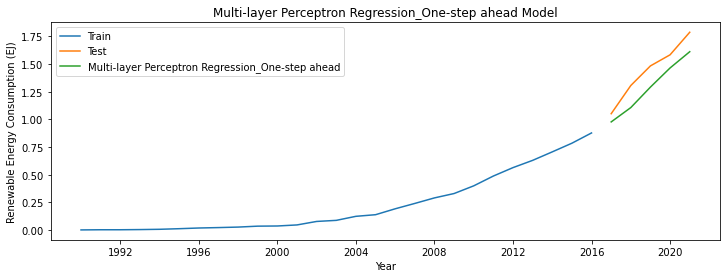

In [168]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat12, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Multi-layer Perceptron Regression_One-step ahead')
plt.legend(loc='best')
plt.title('Multi-layer Perceptron Regression_One-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [169]:
#n-Steps forecasting using MLP




# Function to forecast using the regression model
def forecast_next_n_years(model, initial_data, n_years):
    forecasted_values = []
    input_data = initial_data.copy()

    for _ in range(n_years):
        # Predict the next value
        next_value = model.predict(input_data)
        
        # Store the forecasted value
        forecasted_values.append(next_value[0])
        
        # Prepare the input for the next prediction
        input_data = np.roll(input_data, shift=-1)  # Shift data
        input_data[-1] = next_value  # Append the predicted value

    return forecasted_values

# Initial data for forecasting (last n values from the dataset)
initial_data = finaldf_test_x[0:1]

# Forecast for the next 5 years
forecasts = forecast_next_n_years(MLPRegressor, initial_data, 5)

# Inverse transform to original scale
#forecasts_original_scale = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

#forecasts_original_scale.flatten()  # Display the forecasts for the next 5 years

In [170]:
forecasts

[0.9774981483000178,
 1.2486488793025967,
 1.557946747873929,
 1.9129271853478103,
 2.3202861866723574]

In [171]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test,np.array(forecasts))).round(2)
mape = np.round(np.mean(np.abs(y_test-np.array(forecasts))/y_test)*100,2)
mae = mean_absolute_error(y_test, np.array(forecasts)).round(2)
mse = mean_squared_error(y_test, np.array(forecasts)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Multi-layer Perceptron Regression_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


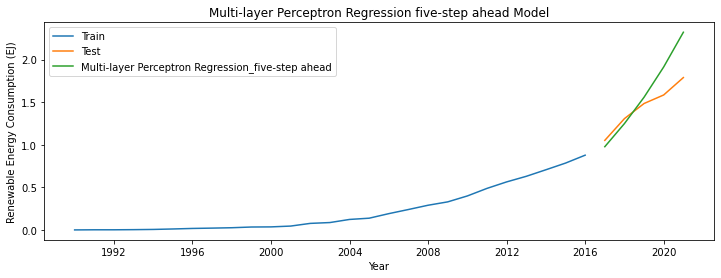

In [172]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=np.array(forecasts), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Multi-layer Perceptron Regression_five-step ahead')
plt.legend(loc='best')
plt.title('Multi-layer Perceptron Regression five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Lasso Regression

In [173]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0]}
len(params["alpha"])

12

In [174]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Applying Lasso
lasso = Lasso()

# Cross Validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score=True,
                       verbose = 1)
lasso_model_cv.fit(finaldf_train_x, finaldf_train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [175]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004189,0.001465,0.002394,0.000487,0.0001,{'alpha': 0.0001},-2.991836,0.833927,0.900846,0.935408,...,0.071009,1.533997,1,0.997117,0.997633,0.998134,0.998305,0.995927,0.997423,0.000856
1,0.003494,0.000446,0.002393,0.000488,0.001,{'alpha': 0.001},-5.574542,0.803423,0.906468,0.923062,...,-0.396172,2.589710,2,0.996880,0.997340,0.997978,0.998123,0.993791,0.996823,0.001580
2,0.003191,0.000399,0.002195,0.000399,0.01,{'alpha': 0.01},-66.965376,-0.722377,0.916110,0.712265,...,-14.097046,26.503527,3,0.973183,0.978176,0.982419,0.979902,0.826969,0.948130,0.060656
3,0.003191,0.000399,0.002394,0.000488,0.05,{'alpha': 0.05},-1122.136637,-34.668379,-0.065863,-2.145795,...,-239.645604,441.539260,4,0.398707,0.513591,0.605209,0.538185,0.000000,0.411138,0.216097
4,0.002993,0.000002,0.002193,0.000399,0.1,{'alpha': 0.1},-1822.332060,-71.811961,-1.876669,-5.310938,...,-388.108595,717.562394,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [176]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
0.07100899882074423


In [177]:
# Lasso regression
lasso=Lasso(alpha=0.0001)
lasso.fit(finaldf_train_x, finaldf_train_y)
print(lasso.coef_)
print(lasso.intercept_)

[-0.         -0.         -0.          0.          1.11182496]
0.01290176265312526


In [178]:
# Predicting R2 score value of train and test set
y_pred_train = lasso.predict(finaldf_train_x)
yhat14 = lasso.predict(finaldf_test_x)

In [179]:
r2_train_lasso = r2_score(finaldf_train_y, y_pred_train)
r2_test_lasso = r2_score(finaldf_test_y, yhat14)

print("r2_train_lasso:",r2_train_lasso)
print("r2_test_lasso:",r2_test_lasso)

r2_train_lasso: 0.9974573933343915
r2_test_lasso: 0.9161801513932396


In [180]:
y_test = np.array(finaldf_test_y)
sumvalue=np.sum(y_test)
mape=np.sum(np.abs((y_test - yhat14)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 95.86 %.


In [181]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat14.reshape(1,5))).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat14.reshape(1,5))/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat14.reshape(1,5)).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat14.reshape(1,5)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Lasso Regression_One-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


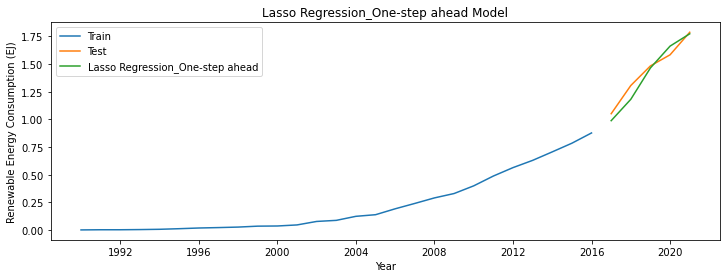

In [182]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat14, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Lasso Regression_One-step ahead')
plt.legend(loc='best')
plt.title('Lasso Regression_One-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [183]:
#n-Steps forecasting using Lasso


# Function to forecast using the regression model
def forecast_next_n_years(model, initial_data, n_years):
    forecasted_values = []
    input_data = initial_data.copy()

    for _ in range(n_years):
        # Predict the next value
        next_value = model.predict(input_data)
        
        # Store the forecasted value
        forecasted_values.append(next_value[0])
        
        # Prepare the input for the next prediction
        input_data = np.roll(input_data, shift=-1)  # Shift data
        input_data[-1] = next_value  # Append the predicted value

    return forecasted_values

# Initial data for forecasting (last n values from the dataset)
initial_data = finaldf_test_x[0:1]

# Forecast for the next 5 years
forecasts = forecast_next_n_years(lasso, initial_data, 5)

# Inverse transform to original scale
#forecasts_original_scale = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

#forecasts_original_scale.flatten()  # Display the forecasts for the next 5 years


In [184]:
forecasts

[0.9887505261635646,
 1.1122192724822364,
 1.2494949058732128,
 1.4021213808700188,
 1.5718153046533048]

In [185]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test,np.array(forecasts))).round(2)
mape = np.round(np.mean(np.abs(y_test-np.array(forecasts))/y_test)*100,2)
mae = mean_absolute_error(y_test, np.array(forecasts)).round(2)
mse = mean_squared_error(y_test, np.array(forecasts)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Lasso Regression_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


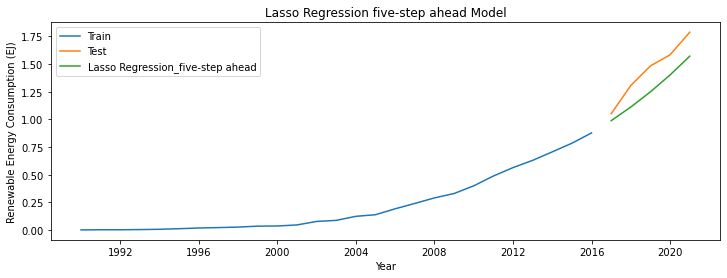

In [186]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=np.array(forecasts), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Lasso Regression_five-step ahead')
plt.legend(loc='best')
plt.title('Lasso Regression five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

## Ridge Regression

In [187]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0]}
len(params["alpha"])

12

In [188]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Applying Lasso
ridge = Ridge()

# Cross Validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score=True,
                       verbose = 1)
ridge_model_cv.fit(finaldf_train_x, finaldf_train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [189]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008890,1.230308e-02,0.001397,0.000489,0.0001,{'alpha': 0.0001},-0.655949,0.733263,0.946869,0.953758,...,0.520508,0.601604,1,0.997876,0.998835,0.998654,0.998683,0.996397,0.998089,0.000910
1,0.001996,7.599534e-07,0.001995,0.000002,0.001,{'alpha': 0.001},-1.919092,0.829986,0.928886,0.937131,...,0.221146,1.093291,2,0.997574,0.998332,0.998406,0.998522,0.996096,0.997786,0.000908
2,0.002497,4.461649e-04,0.001596,0.000489,0.01,{'alpha': 0.01},-8.846415,0.808003,0.839340,0.866422,...,-1.275516,3.800906,3,0.995582,0.996001,0.996871,0.997133,0.995204,0.996158,0.000738
3,0.002793,7.467481e-04,0.001795,0.000399,0.05,{'alpha': 0.05},-19.365178,0.613055,0.756468,0.783285,...,-3.375245,7.996541,4,0.992773,0.992772,0.994688,0.995212,0.992883,0.993666,0.001063
4,0.002599,4.940939e-04,0.001989,0.000641,0.1,{'alpha': 0.1},-26.774745,0.449110,0.748719,0.742895,...,-4.820349,10.977783,5,0.991413,0.991351,0.993702,0.994298,0.987174,0.991588,0.002505


In [190]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.0001}
0.520508369940008


In [191]:
# Lasso regression
ridge=Ridge(alpha=0.0001)
ridge.fit(finaldf_train_x, finaldf_train_y)
print(ridge.coef_)
print(ridge.intercept_)

[-0.62027103  0.50129011 -0.21568532 -0.00612719  1.30287053]
0.0065727219972404605


In [192]:
# Predicting R2 score value of train and test set
y_pred_train = ridge.predict(finaldf_train_x)
yhat15 = ridge.predict(finaldf_test_x)

In [193]:
r2_train_ridge = r2_score(finaldf_train_y, y_pred_train)
r2_test_ridge = r2_score(finaldf_test_y, yhat15)

print("r2_train_ridge:",r2_train_ridge)
print("r2_test_ridge:",r2_test_ridge)

r2_train_ridge: 0.9982872052224779
r2_test_ridge: 0.8881573413760219


In [194]:
y_test = np.array(finaldf_test_y)
sumvalue=np.sum(y_test)
mape=np.sum(np.abs((y_test - yhat15)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 95.15 %.


In [195]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test.reshape(1,5),yhat15.reshape(1,5))).round(2)
mape = np.round(np.mean(np.abs(y_test.reshape(1,5)-yhat15.reshape(1,5))/y_test.reshape(1,5))*100,2)
mae = mean_absolute_error(y_test.reshape(1,5), yhat15.reshape(1,5)).round(2)
mse = mean_squared_error(y_test.reshape(1,5), yhat15.reshape(1,5)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Ridge Regression_One-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE,MAE,MSE
0,Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
0,Holt Winters's additive forecast,0.35,21.39,0.32,0.12
0,Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
0,ARMA method,1.27,70.51,1.09,1.60
0,ARIMA method,1.46,100.00,1.44,2.14
0,SARIMA method,0.50,24.92,0.40,0.25
0,Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
0,Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
0,Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07
0,Stacked LSTM_five-step ahead,0.18,11.58,0.17,0.03


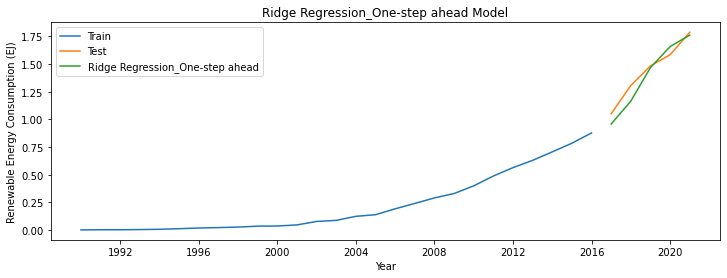

In [196]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=yhat15, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Ridge Regression_One-step ahead')
plt.legend(loc='best')
plt.title('Ridge Regression_One-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

In [197]:
#n-Steps forecasting using Ridge


# Function to forecast using the regression model
def forecast_next_n_years(model, initial_data, n_years):
    forecasted_values = []
    input_data = initial_data.copy()

    for _ in range(n_years):
        # Predict the next value
        next_value = model.predict(input_data)
        
        # Store the forecasted value
        forecasted_values.append(next_value[0])
        
        # Prepare the input for the next prediction
        input_data = np.roll(input_data, shift=-1)  # Shift data
        input_data[-1] = next_value  # Append the predicted value

    return forecasted_values

# Initial data for forecasting (last n values from the dataset)
initial_data = finaldf_test_x[0:1]

# Forecast for the next 5 years
forecasts = forecast_next_n_years(ridge, initial_data, 5)

# Inverse transform to original scale
#forecasts_original_scale = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

#forecasts_original_scale.flatten()  # Display the forecasts for the next 5 years

In [198]:
forecasts

[0.958707327534835,
 0.9289230842586023,
 0.9002683459599468,
 0.8727002785308295,
 0.8461776722569476]

In [199]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test,np.array(forecasts))).round(2)
mape = np.round(np.mean(np.abs(y_test-np.array(forecasts))/y_test)*100,2)
mae = mean_absolute_error(y_test, np.array(forecasts)).round(2)
mse = mean_squared_error(y_test, np.array(forecasts)).round(2)


# Construct results dataframe
tempResults = pd.DataFrame({
    'Method': ['Ridge Regression_five-step ahead'],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MAE': [mae],
    'MSE': [mse]
})

results = pd.concat([results, tempResults])
results.set_index('Method', inplace=True)
results

,RMSE,MAPE,MAE,MSE
Method,,,,
Holt's exponential smoothing forecast,0.84,54.68,0.81,0.71
Holt Winters's additive forecast,0.35,21.39,0.32,0.12
Holt Winters's multiplicative forecast,0.38,22.65,0.34,0.14
ARMA method,1.27,70.51,1.09,1.60
ARIMA method,1.46,100.00,1.44,2.14
SARIMA method,0.50,24.92,0.40,0.25
Vanilla LSTM_one-step ahead,0.15,24.27,0.12,0.02
Vanilla LSTM_five-step ahead,0.20,11.94,0.18,0.04
Stacked LSTM_one-step ahead,0.27,31.54,0.18,0.07


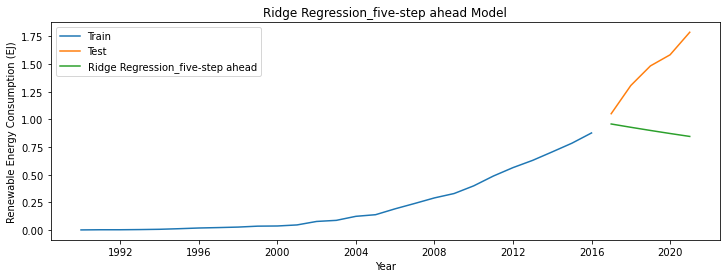

In [200]:
plt.figure(figsize=(12,4))
plt.plot(data['Renewable Energy Consumption (EJ)'][:27], label='Train')
df1=pd.DataFrame(data=y_test, index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
df2=pd.DataFrame(data=np.array(forecasts), index=pd.to_datetime([2017, 2018, 2019, 2020, 2021],format="%Y"))
plt.plot(df1, label='Test')
plt.plot(df2, label='Ridge Regression_five-step ahead')
plt.legend(loc='best')
plt.title('Ridge Regression_five-step ahead Model')
plt.ylabel("Renewable Energy Consumption (EJ)")
plt.xlabel("Year")
plt.show()

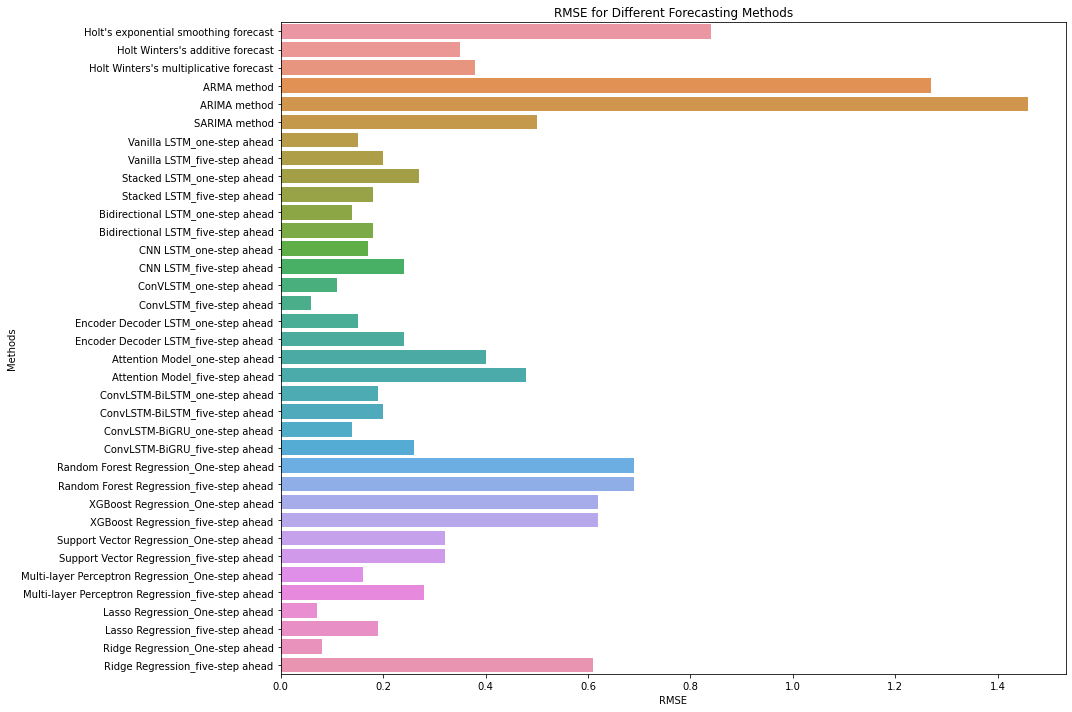

In [205]:
# Plotting the RMSE for Different Forecasting Methods
plt.figure(figsize=(15, 10))
sns.barplot(x=results["RMSE"], y=results.index)
plt.title('RMSE for Different Forecasting Methods')
plt.xlabel('RMSE')
plt.ylabel('Methods')
plt.tight_layout()
plt.show()

In [206]:
# Categorizing the methods
categories = ["Traditional Statistical", "Traditional Statistical", "Traditional Statistical", 
              "Traditional Statistical", "Traditional Statistical", "Traditional Statistical", 
              "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning", 
              "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning", 
              "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning", "Deep Learning", 
              "Deep Learning", "Deep Learning", "Deep Learning", "Machine Learning", "Machine Learning", 
              "Machine Learning", "Machine Learning", "Machine Learning", "Machine Learning", 
              "Machine Learning", "Machine Learning", "Machine Learning", "Machine Learning", 
              "Machine Learning", "Machine Learning"]

# Creating DataFrame
df_rmse = pd.DataFrame({'Method': results.index, 'Value': results["RMSE"], 'Metric': 'RMSE', 'Category': categories})
df_mape = pd.DataFrame({'Method': results.index, 'Value': results["MAPE"], 'Metric': 'MAPE', 'Category': categories})

df = pd.concat([df_rmse, df_mape], axis=0)

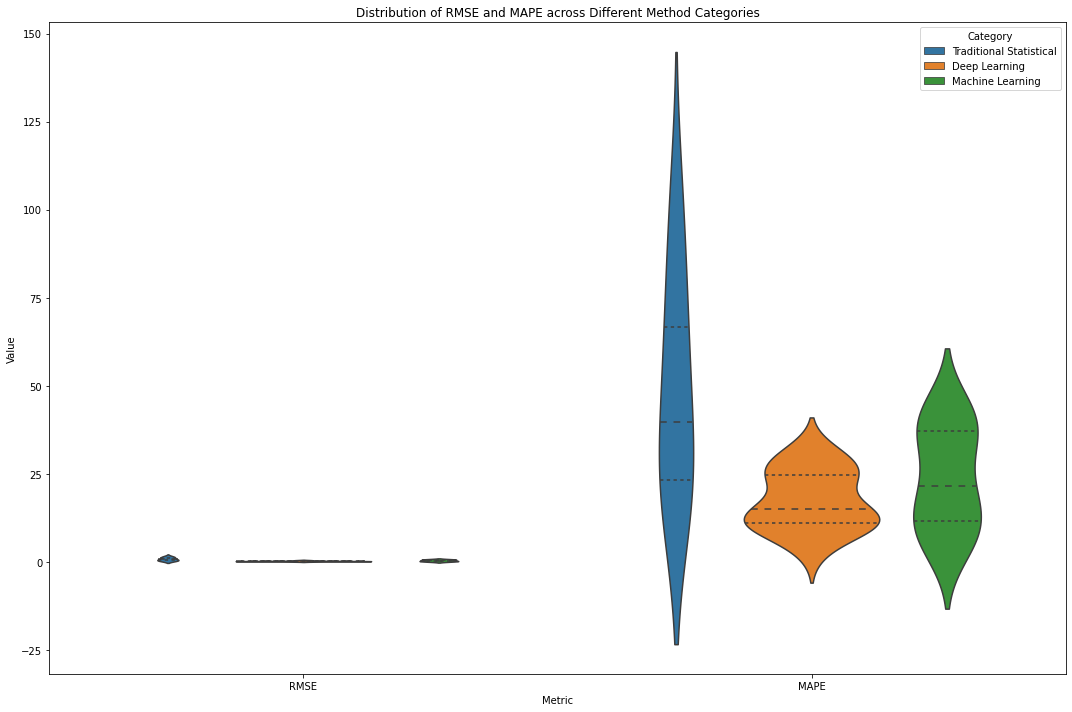

In [207]:
# Plotting Violin Plots for RMSE and MAPE across categories without splitting
plt.figure(figsize=(15, 10))
sns.violinplot(x='Metric', y='Value', hue='Category', data=df, inner="quartile")
plt.title('Distribution of RMSE and MAPE across Different Method Categories')
plt.tight_layout()
plt.show()